## Phase 4 Project Submission
* Group members: Bedan Njoroge, Yvonne Kamari, Samuel Lumumba
* Student Pace: Part time

# Super Store Time Series Analysis

## Business Problem

 Superstores face significant challenges in optimizing inventory management and maximizing sales potential within the furniture and office supplies categories.

 The lack of accurate sales forecasts, inadequate insights into consumer behavior, and ineffective inventory strategies lead to understocking or overstocking issues, resulting in missed sales opportunities or increased carrying costs.

## Project Objective

The objective of this project is to leverage time series analysis techniques, including ARIMA, SARIMA, Facebook Prophet, and LSTM models, on sales data pertaining to furniture, office supplies and technology from the Superstore. The primary goals include:

1. **Forecasting Future Sales**
2. **Identifying Trends, Patterns, and Seasonality**
3. **Actionable Insights for Inventory Management**: Provide actionable insights to optimize inventory levels, ensuring adequate stock availability while minimizing surplus or shortage issues.
4. **Enhancing Marketing Strategies**: Understand consumer behavior and sales patterns to devise effective marketing strategies targeted at boosting furniture, office supplies and technology sales.
5. **Improving Overall Business Performance**: Utilize insights derived from the analysis to enhance operational efficiency, profitability, and overall business performance within these specific product categories.

## Data Understanding
The [Superstore sales dataset](https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls) is sourced from Tableau and consists of the following columns,

* __Order ID__: Unique identifier for each order.
* __Order Date__: Date when the order was placed.
* __Ship Date__: Date when the order was shipped.
* __Ship Mode__: Shipping mode used for the order (e.g., First Class, Standard Class, Second Class, Same Day).
* __Customer ID__: Unique identifier for each customer.
* __Customer Name__: Name of the customer.
* __Segment__: Segmentation of customers (Consumer, Corporate, Home Office).
* __Country__: Country where the store operates (contains only United States).
* __City__: City where the order was shipped.
* __State__: State where the order was shipped.
* __Postal Code__: Postal code of the shipping address.
* __Region__: Geographical region of the United States (e.g., East, West, North, South).
* __Product ID__: Unique identifier for each product.
* __Category__: Category of the product (Furniture, Office Supplies, Technology).
* __Sub-Category__: Sub-category of the product (Bookcases, Chairs, Labels, Tables, Storage, Furnishings, Art, Phones, Binders, Paper, Appliances, Accessories, Copiers, Envelopes, Fasteners, Machines, Supplies).
* __Product Name__: Name of the product.
* __Sales__: Total sales revenue for the order.
* __Quantity__: Quantity of products ordered.
* __Discount__: Percentage of discount applied to the order.
* __Profit__: Profit generated from the order.

The time series analysis will particularly emphasize sales data related to furniture and office supplies.

## Importing the Required Libraries and Models

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from prophet import Prophet

## Exploratory Data Analysis

In [2]:
df = pd.read_excel("Sample - Superstore.xls")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

The dataset comprises of 9,994 orders made in the superstore, each characterized by 21 features providing specific details or characteristics about the order and contains 4 years of sales data (2014 - 2017).

In [4]:
# Display summary information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

We observe the following key points from the summary information:
1. The dataset includes colums with different data types. All columns appear to be in the expected data type.
* int64: There are three columns of integer type: Row ID, Postal Code, and Quantity.
* float64: Three columns (Sales, Discount, Profit) are of floating-point numeric type.
* object: Thirteen columns are of object type, generally representing categorical or textual data.
* datetime64[ns]: Two columns (Order Date, Ship Date) are of datetime type, representing dates and times.

2.  Every column within the dataset comprises 9994 non-null entries. This implies the absence of any missing or null values throughout the columns.

In [5]:
# Confirm whether there are missing values in the dataframe
print("Are there missing values in the dataframe?",
      df.isnull().values.any())

Are there missing values in the dataframe? False


In [6]:
# Check for duplicates
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


The dataset does not contain any duplicates, indicating that each entry within the dataset is unique.

In [7]:
# Display statistics for numeric data
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


* The average sale amounts to \$229.86, with a notable standard deviation of \$623.25, suggesting a broad spectrum of sales values, ranging from \$0.444 to \$22,638.48.
* Quantity, representing the number of items per order, shows an average of 3.79 units, with the majority of orders containing 1 to 14 items, exhibiting a standard deviation of 2.23.
* Discounts, applied across orders, have an average rate of 15.6%, with a standard deviation of 20.6%. Most orders feature no discount (0%), yet some exhibit discounts up to 80%, signifying variations in applied discount rates.
* The average profit per order stands at \$28.66, with a substantial standard deviation of \$234.26, spanning from a minimum loss of \$6,599.98 to a maximum profit of \$8,399.98. This suggests a wide range of profitability across the orders, with instances of significant losses and gains.

In [8]:
# Grouping the data by 'Segment' and calculating the total sales for each segment
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()
segment_sales

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


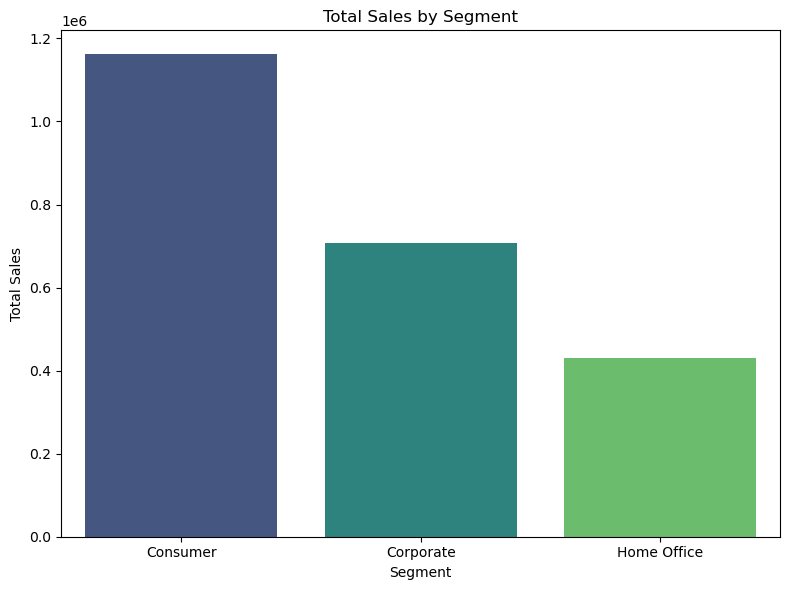

In [9]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Segment', y='Sales', data=segment_sales, palette='viridis')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.title('Total Sales by Segment')
plt.xticks()
plt.tight_layout()

plt.show()

* With the highest total sales reaching approximately \$1.16 million, the Consumer segment stands out as the primary contributor to overall revenue.
* The Corporate segment stands as the second-highest revenue generator with sales revenue totaling around \$706,146.
* The Home Office segment, yielding sales revenue of roughly \$429,653, demonstrates a comparatively lower but still substantial contribution to the superstore's total revenue.

In [10]:
# Grouping the data by 'Segment' and calculating the total profit for each segment
segment_profit = df.groupby('Segment')['Profit'].sum().reset_index()
segment_profit

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


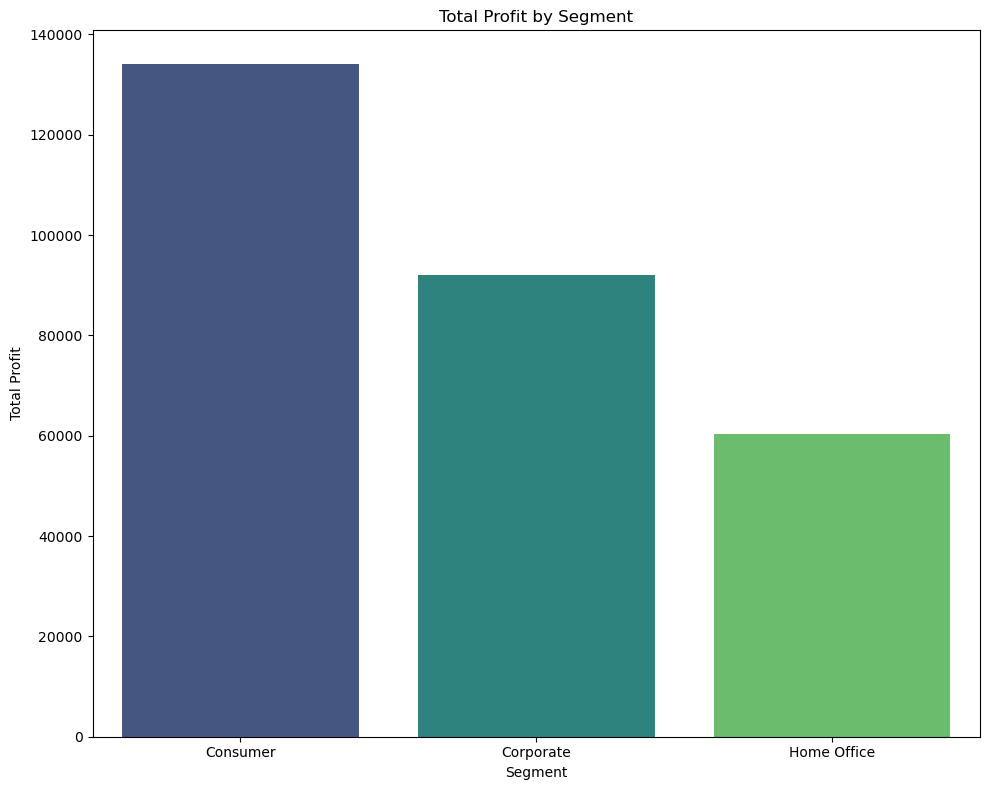

In [11]:
# Plotting the horizontal bar chart using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Segment', y='Profit', data=segment_profit, palette='viridis')
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.title('Total Profit by Segment')
plt.tight_layout()

plt.show()

* The Consumer segment emerges as the dominant force, contributing the highest sales revenue and achieving the highest profitability of \$134,119.21.
* In contrast, the Corporate segment, despite generating a notable sales volume, reports a comparatively lower profit of \$91,979.13, suggesting a slightly lower profitability relative to sales.
* The Home Office segment lags behind in both sales and profitability, earning \$60,298.68, indicating its lower revenue contribution and more moderate profitability compared to the other segments.

Overall, the Consumer segment stands out by not only leading in sales but also maintaining higher profitability relative to its sales figures.

In [12]:
# Grouping the data by 'Category' and calculating the total sales for each category
category_sales = df.groupby('Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
category_sales

,Category,Sales
2,Technology,836154.0330
0,Furniture,741999.7953
1,Office Supplies,719047.0320


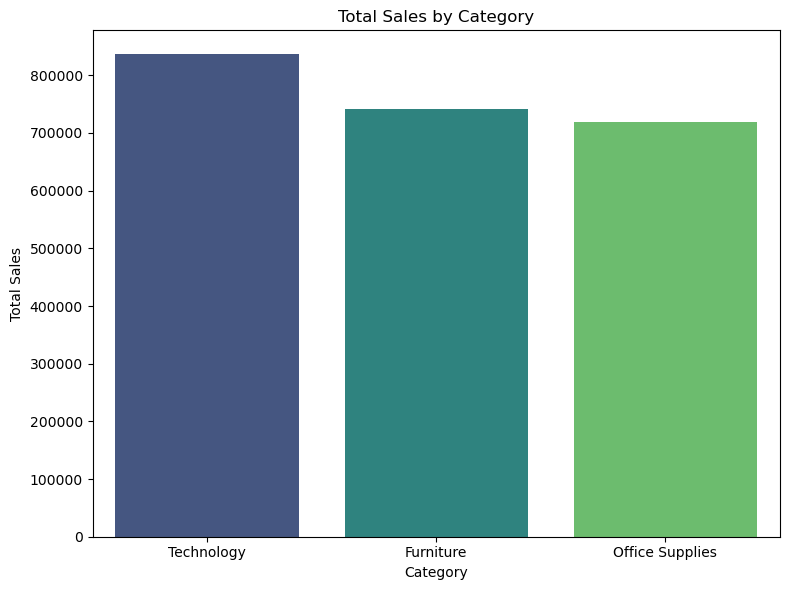

In [13]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Sales', data=category_sales, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category')
plt.xticks()
plt.tight_layout()

plt.show()

* The Technology category emerges as the leading revenue generator with total sales reaching \$836,154.03.
* Following closely behind, the Furniture category reports a substantial sales figure of \$741,999.80, signifying a considerable consumer interest in furniture-related products.
* The Office Supplies category secures \$719,047.03 in sales, slightly trailing the Furniture category, indicating a competitive position within the market.

In [14]:
# Grouping the data by 'Category' and calculating the total profit for each segment
category_profit = df.groupby('Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
category_profit

,Category,Profit
2,Technology,145454.9481
1,Office Supplies,122490.8008
0,Furniture,18451.2728


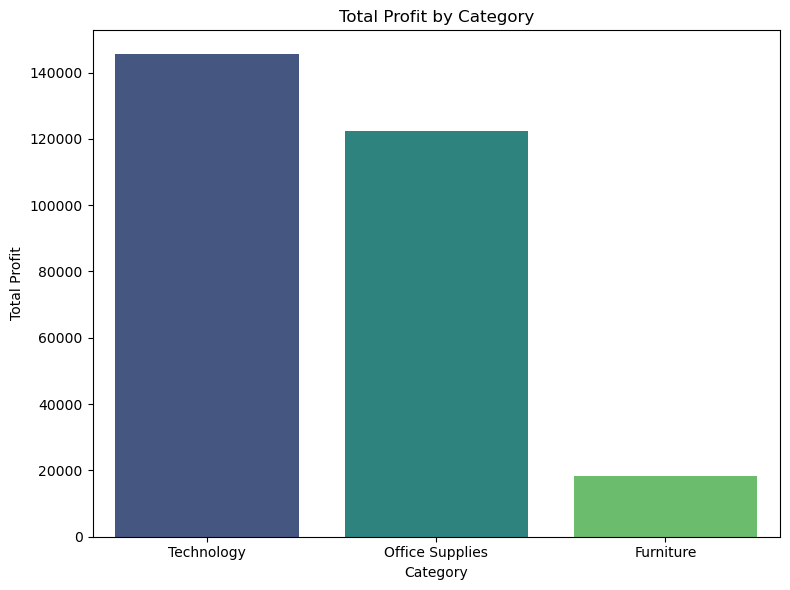

In [15]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Profit', data=category_profit, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.title('Total Profit by Category')
plt.xticks()
plt.tight_layout()

plt.show()

* Technology emerges as the most profitable category, generating a substantial profit of \$145,454.95. This category showcases a notably higher profitability relative to the other categories, indicating efficient cost management and higher profit margins.
* Office Supplies follow closely behind, reporting a commendable profit of \$122,490.80.
* The Furniture category reports a lower profitability figure of \$18,451.27, indicating higher costs associated with the production of items under this category resulting in a comparatively lower profit margin compared to the other categories.

In [16]:
# Grouping the data by 'Sub-Category' and calculating the total sales for each sub-category
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
subcategory_sales

,Sub-Category,Sales
13,Phones,330007.0540
5,Chairs,328449.1030
14,Storage,223843.6080
16,Tables,206965.5320
3,Binders,203412.7330
11,Machines,189238.6310
0,Accessories,167380.3180
6,Copiers,149528.0300
4,Bookcases,114879.9963
1,Appliances,107532.1610


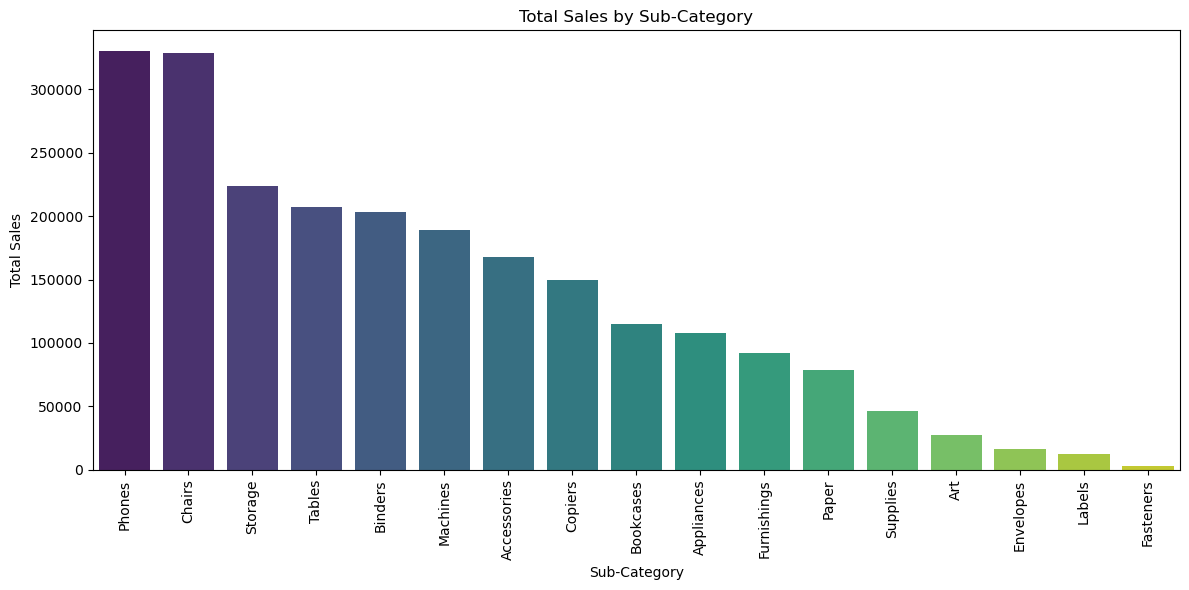

In [17]:
# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Sales', data=subcategory_sales, palette='viridis')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Sub-Category')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

* Phones and Chairs emerge as the leading sub-categories, demonstrating remarkable sales figures of \$330,007.05 and \$328,449.10, respectively, showcasing their significance in driving revenue within the superstore.
* Storage and Tables secure notable sales figures of \$223,843.61 and \$206,965.53, respectively, emphasizing their substantial contributions to overall sales.
* Binders and Machines follow closely, reporting robust sales figures of \$203,412.73 and \$189,238.63, respectively.
* However, at the lower end, Labels, Fasteners, and Envelopes exhibit comparatively lower sales figures of \$12,486.31, \$3,024.28, and \$16,476.40, respectively, within the sub-category sales landscape.

In [18]:
# Grouping the data by 'Sub-Category' and calculating the total profit for each sub-category
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
subcategory_profit

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


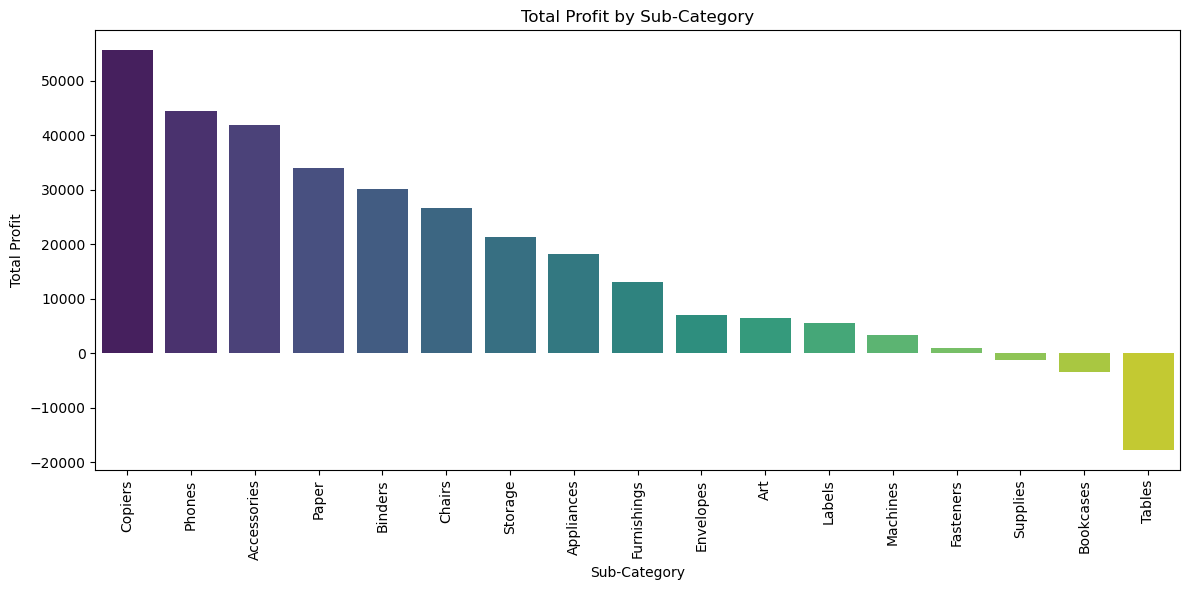

In [19]:
# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Profit', data=subcategory_profit, palette='viridis')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.title('Total Profit by Sub-Category')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

* Copiers emerge as the most profitable sub-category, generating a substantial profit of \$55,617.82, indicating robust financial success and higher profit margins within this product sector.
* Phones and Accessories follow closely, reporting profits of \$44,515.73 and \$41,936.64, respectively, showcasing strong profitability within these categories.
* Notably, Paper, Binders, and Chairs also demonstrate respectable profitability, reporting profits of \$34,053.57, \$30,221.76, and \$26,590.17, respectively.
* However, some sub-categories, such as Supplies, Bookcases, and Tables, incur losses, indicating negative profit margins in these product sectors.

In [20]:
# Grouping the data by 'Product Name' and calculating the total sales for each product
product_sales = df.groupby('Product Name')['Sales'].sum().reset_index().nlargest(10, 'Sales')
product_sales

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
786,HON 5400 Series Task Chairs for Big and Tall,21870.576
686,GBC DocuBind TL300 Electric Binding System,19823.479
688,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
805,Hewlett Packard LaserJet 3310 Copier,18839.686
787,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
683,GBC DocuBind P400 Electric Binding System,17965.068
813,High Speed Automatic Electric Letter Opener,17030.312


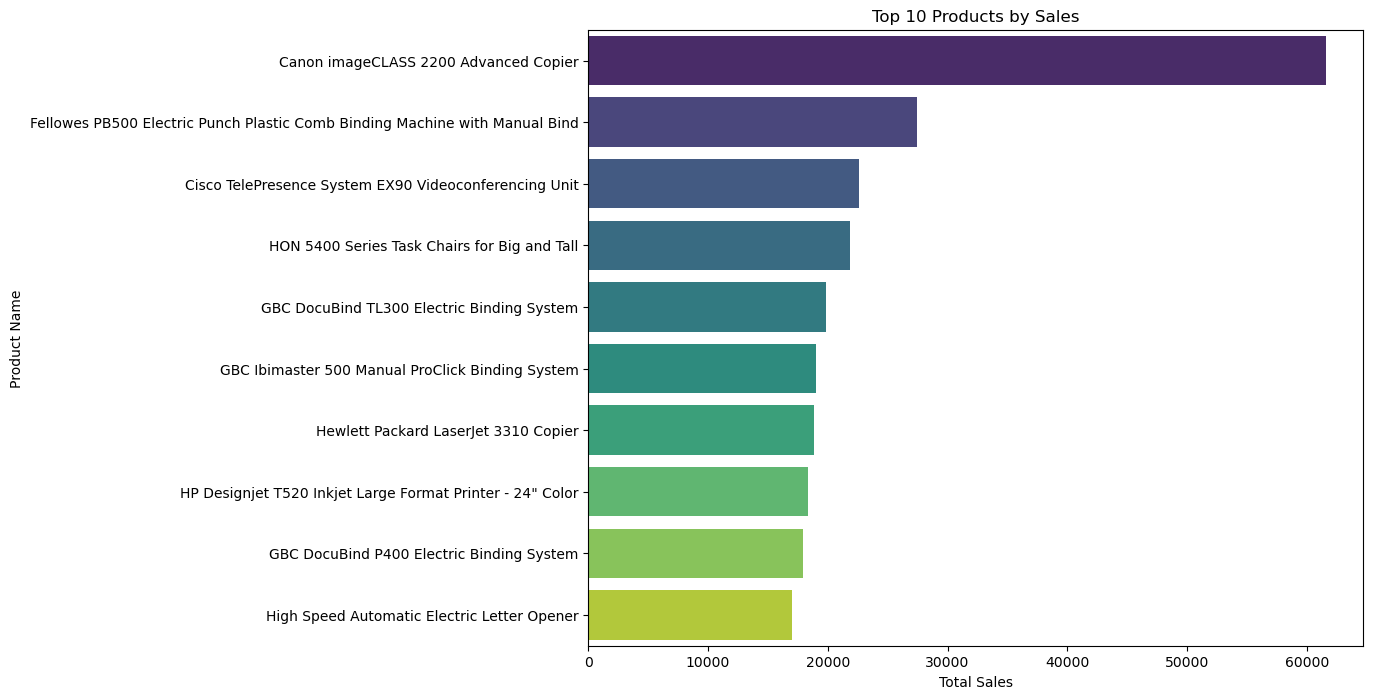

In [21]:
# Plotting the horizontal bar chart using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Sales', y='Product Name', data=product_sales, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Sales')

plt.show()

* The Canon imageCLASS 2200 Advanced Copier leads in sales, demonstrating significant popularity with sales amounting to \$61,599.82. It is followed by the Fellowes PB500 Electric Punch Plastic Comb Binding Machine with sales of \$27,453.38 and the Cisco TelePresence System EX90 Videoconferencing Unit with sales of \$22,638.48, signifying substantial consumer interest in these products.
* Additionally, items like the HON 5400 Series Task Chairs for Big and Tall individuals and the GBC DocuBind TL300 Electric Binding System also demonstrate notable sales figures, indicating their popularity among consumers.

In [22]:
# Grouping the data by 'Product Name' and calculating the total profit for each product
product_profit = df.groupby('Product Name')['Profit'].sum().reset_index().nlargest(10, 'Profit')
product_profit

,Product Name,Profit
404,Canon imageCLASS 2200 Advanced Copier,25199.9280
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
805,Hewlett Packard LaserJet 3310 Copier,6983.8836
400,Canon PC1060 Personal Laser Copier,4570.9347
787,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
165,Ativa V4110MDD Micro-Cut Shredder,3772.9461
19,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
1276,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820
895,Ibico EPK-21 Electric Binding System,3345.2823
1840,Zebra ZM400 Thermal Label Printer,3343.5360


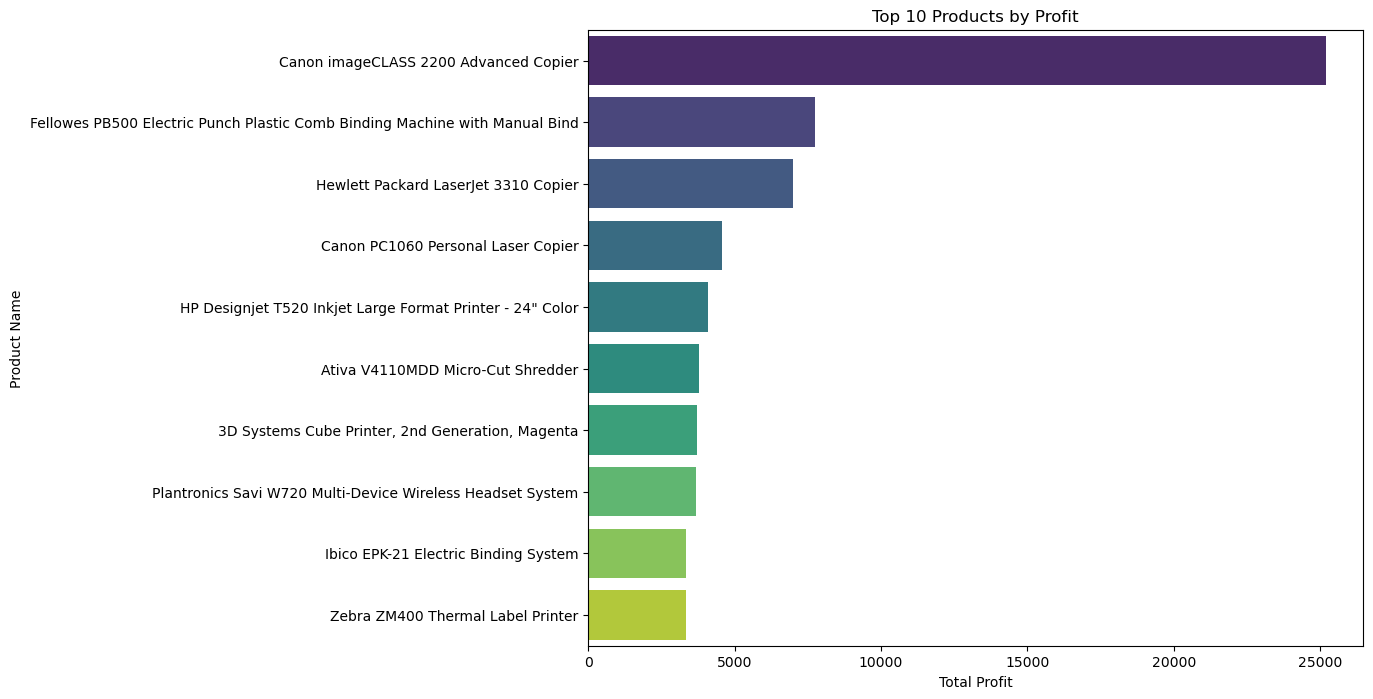

In [23]:
# Plotting the horizontal bar chart using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Profit', y='Product Name', data=product_profit, palette='viridis')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Profit')

plt.show()

* The Canon imageCLASS 2200 Advanced Copier, previously leading in sales, maintains its dominance by generating the highest profit of \$25,199.93.
* Similarly, the Fellowes PB500 Electric Punch Plastic Comb Binding Machine and the Hewlett Packard LaserJet 3310 Copier, which ranked high in sales, exhibit notable profitability with profits of \$7,753.04 and \$6,983.88, respectively.
* Notably, certain items like the Canon PC1060 Personal Laser Copier and the HP Designjet T520 Inkjet Large Format Printer show respectable profits despite not being among the top-selling products.

In [24]:
# Grouping the data by 'State' and calculating the total sales for each state
state_sales = df.groupby('State')['Sales'].sum().reset_index().nlargest(10, 'Sales')
state_sales

,State,Sales
3,California,457687.6315
30,New York,310876.2710
41,Texas,170188.0458
45,Washington,138641.2700
36,Pennsylvania,116511.9140
8,Florida,89473.7080
11,Illinois,80166.1010
33,Ohio,78258.1360
20,Michigan,76269.6140
44,Virginia,70636.7200


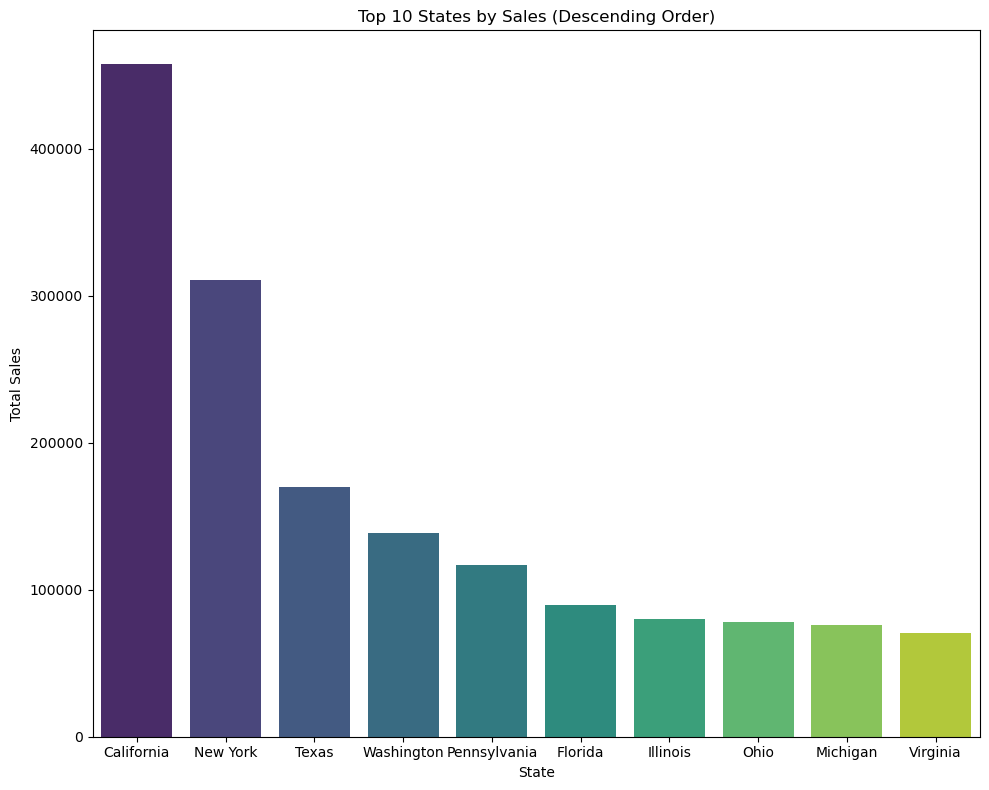

In [25]:
# Plotting the horizontal bar chart using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='State', y='Sales', data=state_sales, palette='viridis')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Top 10 States by Sales (Descending Order)')
plt.tight_layout()

plt.show()

California emerges as the top-performing state in terms of sales revenue, generating a substantial sales figure of \$457,687.63, showcasing its significance in driving revenue for the superstore. Following closely behind, New York reports significant sales of \$310,876.27, securing a prominent position in sales performance among the states. Texas and Washington also demonstrate respectable sales figures, contributing \$170,188.05 and \$138,641.27, respectively, to the superstore's overall sales revenue. Pennsylvania, Florida, Illinois, Ohio, Michigan, and Virginia round out the top 10 states in terms of sales, each displaying notable but comparatively lower sales figures.

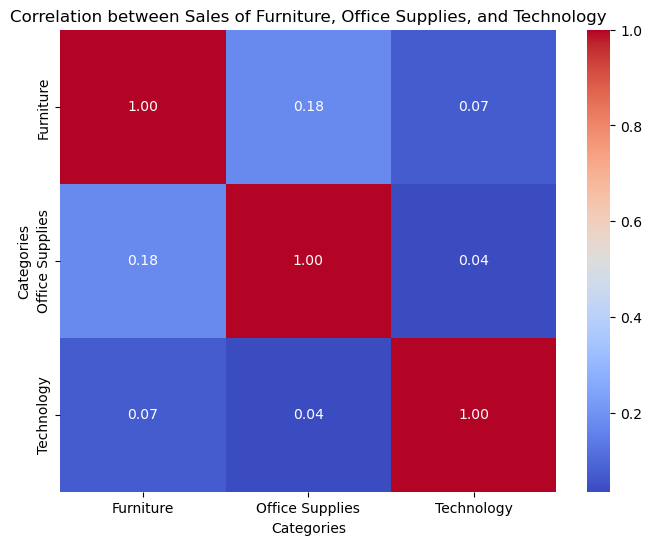

In [26]:
# Filter the DataFrame for the specified categories
categories = ['Furniture', 'Office Supplies', 'Technology']
filtered_df = df[df['Category'].isin(categories)]

# Pivot the data to get sales for each category
pivot_df = filtered_df.pivot_table(values='Sales', index='Order Date', columns='Category', aggfunc='sum')

# Calculate correlation matrix
correlation_matrix = pivot_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Sales of Furniture, Office Supplies, and Technology')
plt.xlabel('Categories')
plt.ylabel('Categories')
plt.show()

There exists a weak positive correlation between the sales of these categories.
The correlations are relatively low (ranging from approximately 0.023 to 0.056), and exhibit only minor tendencies to move together, implying that changes in one category's sales might minimally influence changes in another, but these relationships are not robust or strongly related.








## Data Preprocessing

## Furniture

In [27]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [28]:
columns = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(columns, axis=1, inplace=True)

In [29]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index().sort_values('Order Date')
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


## Make Date the Index

In [30]:
# Set the date column as the index
furniture.set_index('Order Date', inplace=True)

In [31]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

## Resampling

In [32]:
# Downsample 'furniture' to a monthly frequency
monthly_furniture = furniture['Sales'].resample('MS').mean()

In [33]:
monthly_furniture.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049188
Freq: MS, Name: Sales, dtype: float64

## Visualizing Furniture Sales Time Series Data

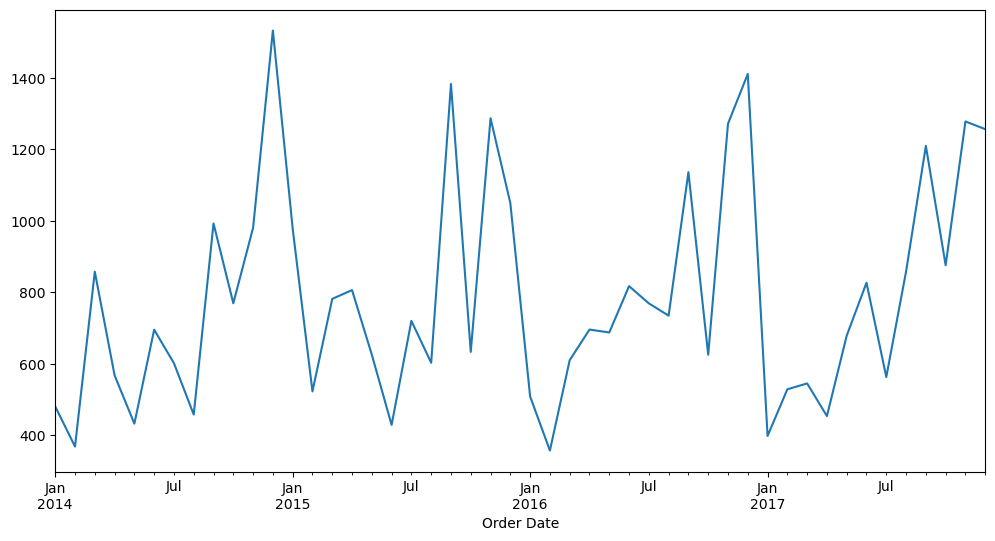

In [34]:
# Visualize the furniture sales time series data
monthly_furniture.plot(figsize=(12, 6))

plt.show()

* Notable peaks are visible during the latter months of the year (October to December), indicating potential seasonality or higher demand for furniture during the holiday season. Thus highlighting the importance of strategic planning for inventory and marketing efforts to capitalize on these peak periods.

* There is a varied level of sales activity in the mid-year months (May to August), showing some fluctuation without any prominent consistent pattern. Additional attention in terms of marketing or promotional strategies is therefore required to maintain consistent sales levels during these periods.


## Testing for Trends/Stationarity

In [38]:
#DickeyFuller Test on furniture

# Perform Dickey-Fuller test
result = adfuller(monthly_furniture)

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

# Compare p-value to a significance level to make a decision about stationarity
if p_value <= 0.05:
    print('The time series is likely stationary.')
else:
    print('The time series is likely non-stationary.')

Test Statistic: -5.191070187339275
P-value: 9.1687566556655e-06
The time series is likely stationary.


## Plotting ACF and PACF

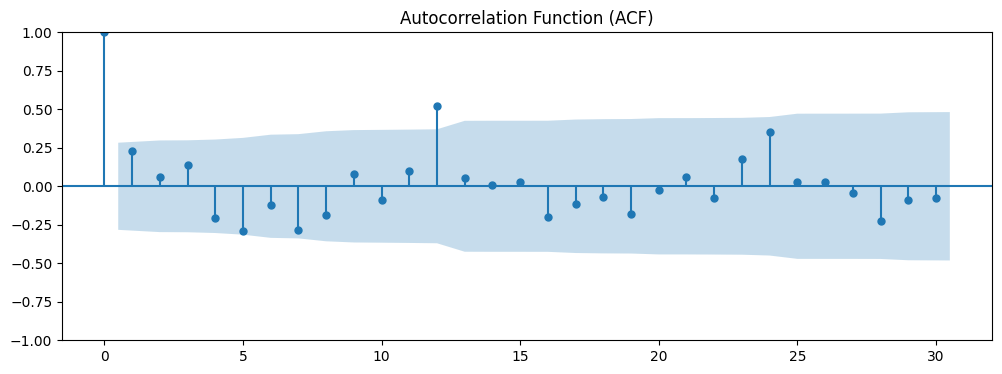

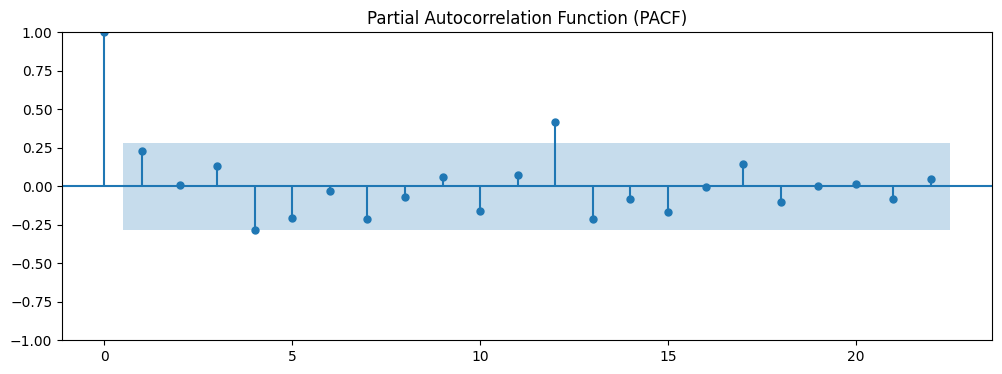

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(monthly_furniture, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(monthly_furniture, lags=22, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

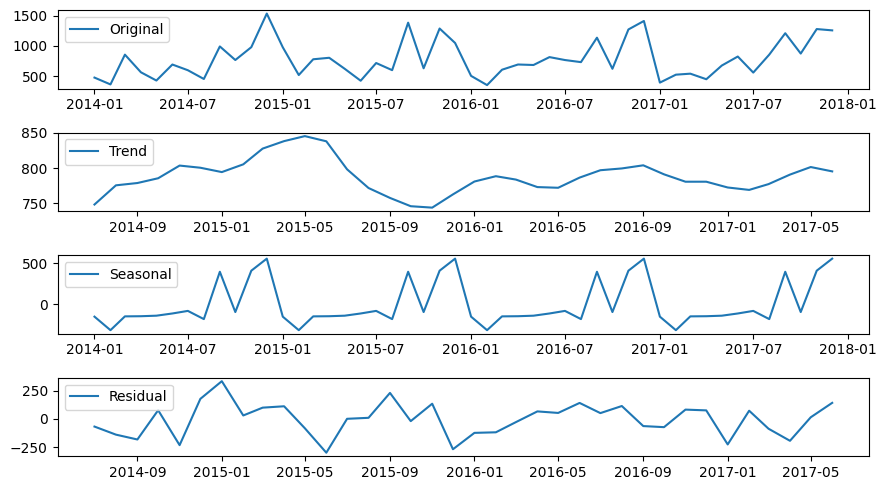

In [40]:
# Checking for Seasonality
tsd_result = seasonal_decompose(monthly_furniture, model='additive')  # Assuming annual seasonality

# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(9, 5))
plt.subplot(4, 1, 1)
plt.plot(monthly_furniture, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(tsd_result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(tsd_result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(tsd_result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In the seasonal component there is are periodic patterns therefore suggesting the presence of seasonality in the time series.

## Train Test Split

In [35]:
# Train test split for furniture
# Choose a split date
split_date = monthly_furniture.tail(12).index[0].strftime('%m/%d/%Y') # Get the top 12th index as a string

# Split train and test data
train_data_furniture = monthly_furniture[monthly_furniture.index < split_date]
test_data_furniture = monthly_furniture[monthly_furniture.index >= split_date]

## Checking for best ARIMA order

In [42]:
# Reset the index to make 'Order Date' a column
monthly_furniture_df = monthly_furniture.reset_index()

# Fit ARIMA models with different orders
p_values = range(3)
q_values = range(3)

best_aic = np.inf
best_order = None

for p in p_values:
    for q in q_values:
        order = (p, 1, q)  # ARIMA model order with differencing (d=1)
        model = ARIMA(monthly_furniture_df['Sales'], order=order)
        results = model.fit()

        # Evaluate model using AIC
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order

# Display the best order and AIC
print(f"Best ARIMA Order: {best_order}")
print(f"AIC for the Best Model: {best_aic}")

Best ARIMA Order: (1, 1, 1)
AIC for the Best Model: 678.4418885418775


## Modeling

We're going to model using;

1.ARIMA - Base Model

2.SARIMA

3.Facebook Prophet

## ARIMA

**Building and testing ARIMA model with Train-Test Split**

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -250.856
Date:                Thu, 14 Dec 2023   AIC                            507.713
Time:                        08:22:51   BIC                            512.379
Sample:                    01-01-2014   HQIC                           509.323
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2312      0.248      0.933      0.351      -0.255       0.717
ma.L1         -0.9096      0.187     -4.861      0.000      -1.276      -0.543
sigma2      9.445e+04   2.22e+04      4.262      0.0

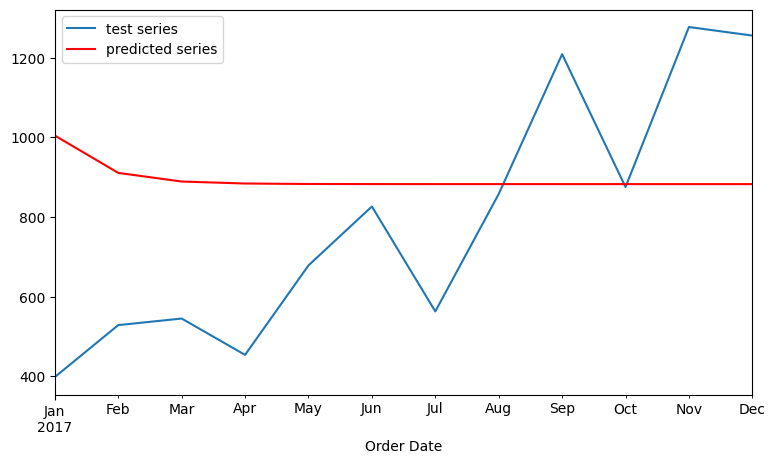

In [43]:
# Set best order as the values obtained
best_order = (1, 1, 1)

# Fit ARIMA model with the best orders on train set
arima_model = ARIMA(train_data_furniture, order=best_order)
arima_fit = arima_model.fit()

# Display the summary of the model
print(arima_fit.summary())

# Get the last date in the training data
last_date_train = train_data_furniture.index[-1]

# Determine the number of months for the forecast
forecast_months = len(test_data_furniture)

# Forecast start date and end date adjustment by months
forecast_start_date = last_date_train + pd.DateOffset(months=1)
forecast_end_date = forecast_start_date + pd.DateOffset(months=forecast_months-1)

# Forecast for the specific date range
arima_pred = arima_fit.predict(start=forecast_start_date, end=forecast_end_date)

# Calculate MAE and RMSE
mae_arma = mean_absolute_error(test_data_furniture, arima_pred)
rmse_arma = np.sqrt(mean_squared_error(test_data_furniture, arima_pred))
print("\n")
print(f"ARIMA Model - MAE: {mae_arma:.2f}, RMSE: {rmse_arma:.2f}")

# Plot forecasts against actual outcomes
plt.figure(figsize=(9, 5))
test_data_furniture.plot(label= 'test series')
arima_pred.plot(color='red', label='predicted series')
plt.legend()
plt.show()

A Mean Absolute Error (MAE) of 272.35 signifies that, on average, the predictions deviate by approximately 272.35 units from the actual values. In comparison, the Root Mean Squared Error (RMSE) of 315.27 indicates the average magnitude of deviations, encompassing both overestimations and underestimations in the predictions.

## SARIMA

Decomposition of the time series shows that it has an annual seasonality, which is a period of 12 months based on the frequency of our series. We will therefore build a SARIMAX model with a period of 12 months.

**Building and testing SARIMA model with Train-Test Split**

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -157.075
Date:                            Thu, 14 Dec 2023   AIC                            324.151
Time:                                    08:22:52   BIC                            329.828
Sample:                                01-01-2014   HQIC                           325.578
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1468      0.355      0.413      0.679      -0.550       0.843
ma.L1         -0.9990     45.506   

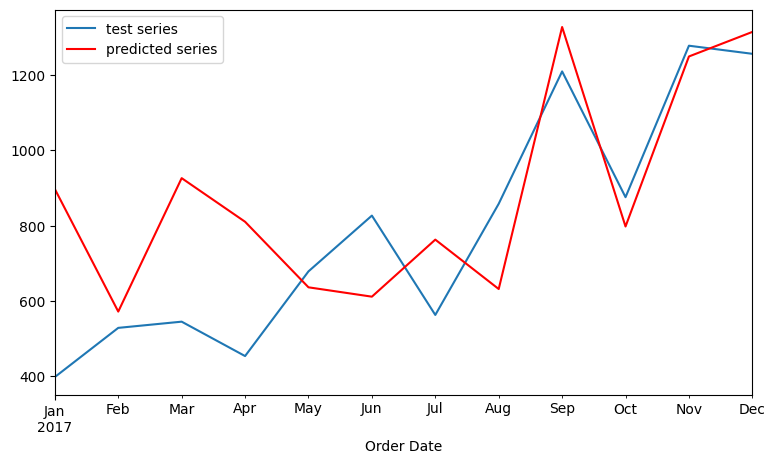

In [44]:
# Set best order as the values obtained
best_order = (1, 1, 1)

# Fit SARIMA model with the best orders on train set
sarimax_model = SARIMAX(train_data_furniture, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarimax_model.fit()

# Display the summary of the model
print(sarima_fit.summary())

# Get the last date in the training data
last_date_train = train_data_furniture.index[-1]

# Determine the number of months for the forecast
forecast_months = len(test_data_furniture)

# Forecast start date and end date adjustment by months
forecast_start_date = last_date_train + pd.DateOffset(months=1)
forecast_end_date = forecast_start_date + pd.DateOffset(months=forecast_months-1)

# Forecast for the specific date range
sarimax_pred = sarima_fit.predict(start=forecast_start_date, end=forecast_end_date)

# Calculate MAE and RMSE
mae_arma = mean_absolute_error(test_data_furniture, sarimax_pred)
rmse_arma = np.sqrt(mean_squared_error(test_data_furniture, sarimax_pred))
print("\n")
print(f"SARIMA Model - MAE: {mae_arma:.2f}, RMSE: {rmse_arma:.2f}")

# Plot forecasts against actual outcomes
plt.figure(figsize=(9, 5))
test_data_furniture.plot(label= 'test series')
sarimax_pred.plot(color='red', label='predicted series')
plt.legend()
plt.show()

The SARIMA model exhibits a significantly lower Mean Absolute Error (MAE) at 151.03 in contrast to the ARIMA model's 272.35. Similarly, the SARIMA model showcases a lower Root Mean Squared Error (RMSE) of 169.31 compared to the ARIMA model's 315.27. Across both MAE and RMSE metrics, the SARIMA model outshines the ARIMA model, signaling an enhancement in predictive accuracy attributed to the incorporation of seasonality. These quantitative measures affirm that the SARIMA model, with its lower values, emerges as a more fitting and accurate choice for analyzing furniture sales data.

## Facebook Prophet

**Building and testing Facebook Prophet model with Train-Test Split**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppknpmxfi/mv0rjgz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppknpmxfi/3hc62aw0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30274', 'data', 'file=/tmp/tmppknpmxfi/mv0rjgz9.json', 'init=/tmp/tmppknpmxfi/3hc62aw0.json', 'output', 'file=/tmp/tmppknpmxfi/prophet_model1nqmu7b_/prophet_model-20231214082252.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:22:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:22:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing




Facebook Prophet Model - MAE: 147.78, RMSE: 194.92


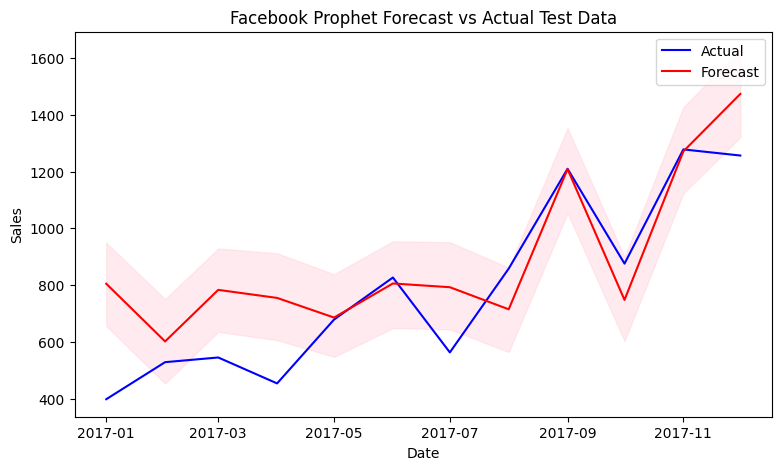

In [46]:
# Find the last date in the training data
last_date_train = train_data_furniture.index[-1]

# Increment the last date by one month to get the start date for forecasting
start_date = last_date_train + pd.DateOffset(months=1)

# Create a DataFrame with future dates starting from the next day
future = pd.DataFrame({'ds': pd.date_range(start=start_date, periods=12, freq='MS')})

# Create and fit the Prophet model
prophet_data = train_data_furniture.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})
fb_model = Prophet()
fb_model.fit(prophet_data)

# Generate forecasts
facebook_pred = fb_model.predict(future)

# Plot the forecast vs the test dataset
# Merge the Prophet forecast with the test_data
merged_df = pd.merge(test_data_furniture, facebook_pred[['ds', 'yhat',
                                                 'yhat_lower', 'yhat_upper']],
                     left_index=True, right_on='ds')

# Plot the actual test data and the forecast
plt.figure(figsize=(9, 5))

# Plot the actual test data
plt.plot(merged_df['ds'], merged_df['Sales'], label='Actual', color='blue')

# Plot the forecast
plt.plot(merged_df['ds'], merged_df['yhat'], label='Forecast', color='red')

# Fill uncertainty intervals
plt.fill_between(merged_df['ds'], merged_df['yhat_lower'], merged_df['yhat_upper'],
                 color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Facebook Prophet Forecast vs Actual Test Data')
plt.legend();

# Evaluate forecasts
# Change the index of forecasted series
facebook_pred = facebook_pred.set_index('ds')
mae_arma = mean_absolute_error(test_data_furniture, facebook_pred['yhat'])
rmse_arma = np.sqrt(mean_squared_error(test_data_furniture, facebook_pred['yhat']))
print("\n")
print(f"Facebook Prophet Model - MAE: {mae_arma:.2f}, RMSE: {rmse_arma:.2f}")

The Facebook Prophet model surpasses both the ARIMA and SARIMA models with a lower Mean Absolute Error (MAE), highlighting superior accuracy in sales predictions. Additionally, the Facebook Prophet model exhibits a lower Root Mean Squared Error (RMSE) compared to ARIMA, showcasing enhanced overall predictive performance. However, it's worth noting that SARIMA maintains a slightly lower RMSE than the Facebook Prophet model. Overall, the Facebook Prophet model outperforms both ARIMA and SARIMA in terms of MAE, indicating better precision in point predictions, and also demonstrates a lower RMSE compared to ARIMA, although SARIMA retains a slight edge in this metric.

## Forecasting Performance Comparison

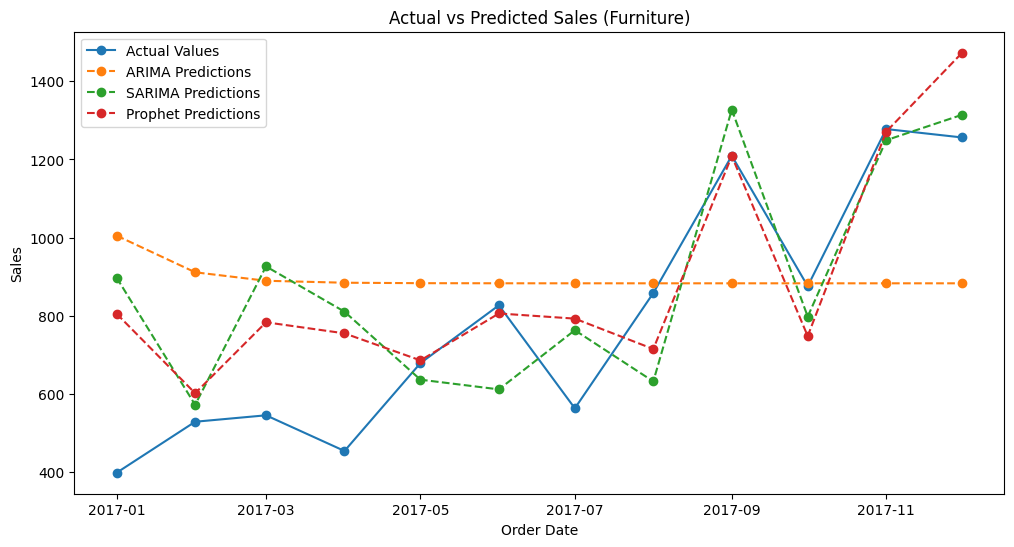

In [47]:
# Plot actual values against predicted values from ARIMA, SARIMA, and Prophet models
plt.figure(figsize=(12, 6))
plt.plot(test_data_furniture.index, test_data_furniture, label='Actual Values', marker='o')  # Plot actual values

# Plot predicted values from ARIMA
plt.plot(test_data_furniture.index, arima_pred, label='ARIMA Predictions', linestyle='dashed', marker='o')

# Plot predicted values from SARIMA
plt.plot(test_data_furniture.index, sarimax_pred, label='SARIMA Predictions', linestyle='dashed', marker='o')

# Plot predicted values from Prophet
plt.plot(merged_df['ds'], merged_df['yhat'], label='Prophet Predictions', linestyle='dashed', marker='o')

plt.title('Actual vs Predicted Sales (Furniture)')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## 5 Year Furniture Forecast - Facebook Prophet

We will use our best performing model Facebook prophet to predict furniture sales for the next 5 years.

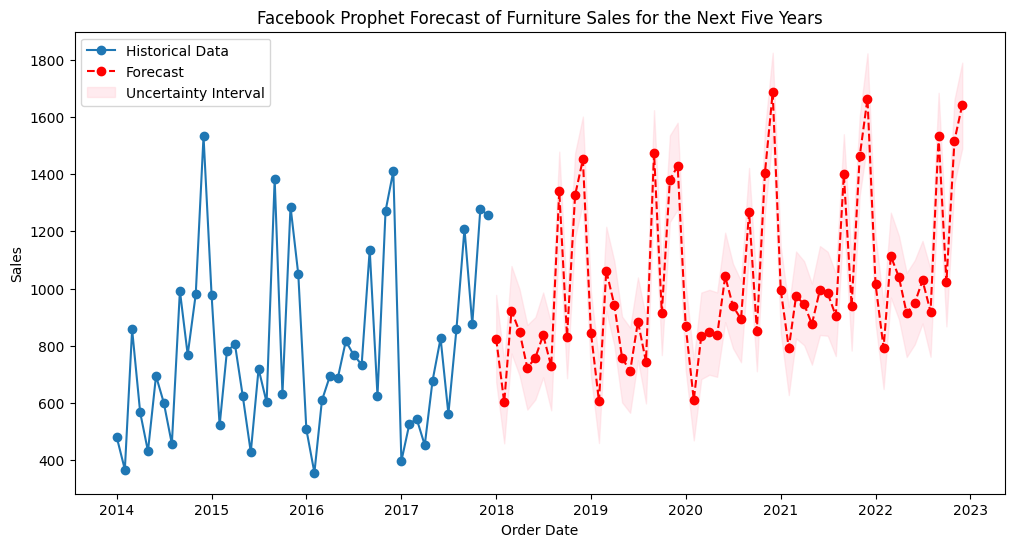

In [48]:
# Generate future dates for the next five years
future_five_years = pd.DataFrame({'ds': pd.date_range(start=monthly_furniture.index[-1] + pd.DateOffset(months=1), periods=12*5, freq='MS')})

# Make predictions for the next five years
forecast_five_years = fb_model.predict(future_five_years)

# Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_furniture.index, monthly_furniture, label='Historical Data', marker='o')
plt.plot(forecast_five_years['ds'], forecast_five_years['yhat'], label='Forecast', linestyle='dashed', marker='o', color='red')
plt.fill_between(forecast_five_years['ds'], forecast_five_years['yhat_lower'], forecast_five_years['yhat_upper'],
                 color='pink', alpha=0.3, label='Uncertainty Interval')

plt.title('Facebook Prophet Forecast of Furniture Sales for the Next Five Years')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

**Observations:**

Sales exhibit a recurring pattern, hitting their lowest in the initial months of the year—January and February—before gradually ascending. The peak of sales is consistently reached towards the year's conclusion, specifically in October, November, and December. Additionally, there is a notable dip in sales around April and mid-year in June.

The forecast aptly captures the inherent seasonality in the data, accurately reflecting the trend of lower sales at the year's commencement and a surge towards the end.

Within the forecast, a discernible upward trajectory in sales is anticipated over the next five years.

## Office Supplies

In [36]:
office_supplies = df.loc[df['Category'] == 'Office Supplies']
office_supplies.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [37]:
columns = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
office_supplies.drop(columns, axis=1, inplace=True)

In [38]:
office_supplies = office_supplies.groupby('Order Date')['Sales'].sum().reset_index().sort_values('Order Date')
office_supplies.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


## Make Date the Index

In [39]:
# Set the date column as the index
office_supplies.set_index('Order Date', inplace=True)

In [40]:
office_supplies.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

## Resampling

In [41]:
# Downsample 'office supplies' to a monthly frequency
monthly_office_supplies = office_supplies['Sales'].resample('MS').mean()

In [42]:
monthly_office_supplies.head()

Order Date
2014-01-01    285.357647
2014-02-01     63.042588
2014-03-01    391.176318
2014-04-01    464.794750
2014-05-01    324.346545
Freq: MS, Name: Sales, dtype: float64

## Visualizing Office Supplies Sales Time Series Data

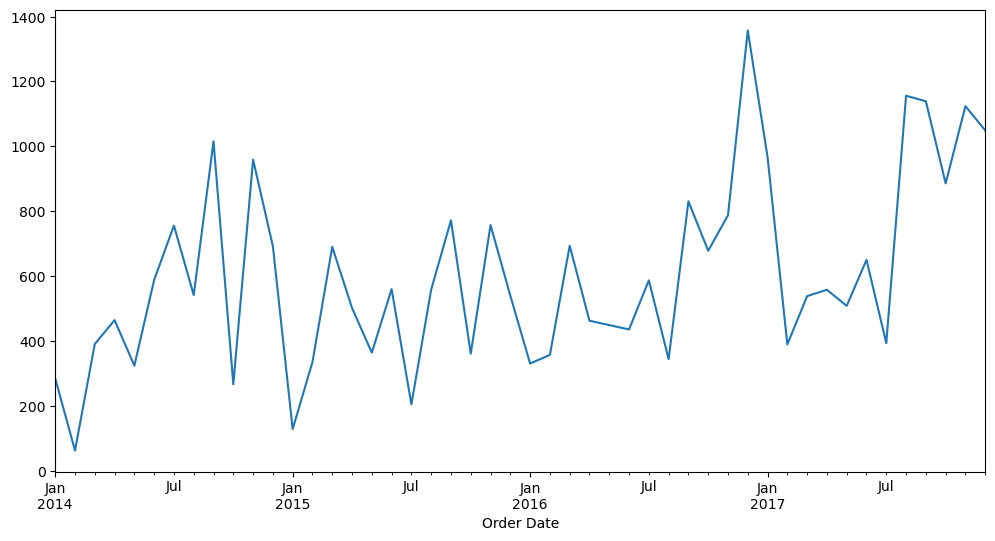

In [43]:
# Visualize the office supplies sales time series data
monthly_office_supplies.plot(figsize=(12, 6))

plt.show()

* Office supply sales figures exhibit considerable variation from month to month and year to year without a clear linear trend or cyclic behavior. The erratic and unpredictable nature of sales indicates challenges in forecasting and planning inventory based on historical data alone in addition to development of targeted marketing strategies for the superstore.

## Testing for Trends/Stationarity

In [57]:
#DickeyFuller Test on office supplies

#Perform Dickey-Fuller test
result = adfuller(monthly_office_supplies)

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

# Compare p-value to a significance level to make a decision about stationarity
if p_value <= 0.05:
    print('The time series is likely stationary.')
else:
    print('The time series is likely non-stationary.')

Test Statistic: -4.664633175077929
P-value: 9.801371572373145e-05
The time series is likely stationary.


## Plotting ACF & PACF

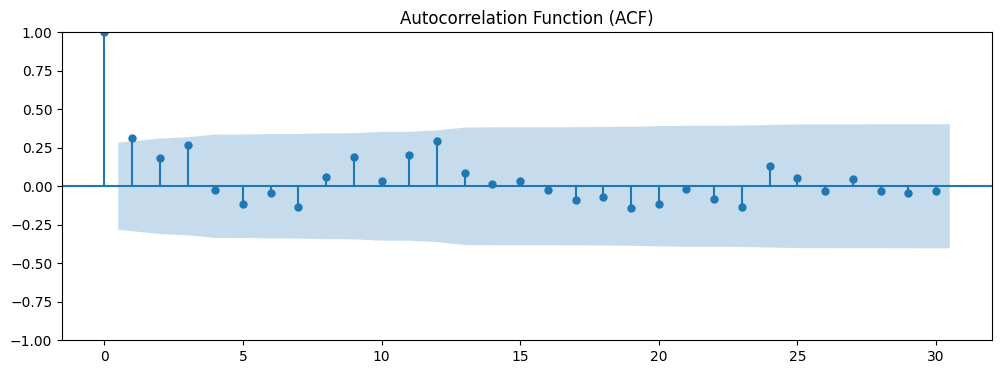

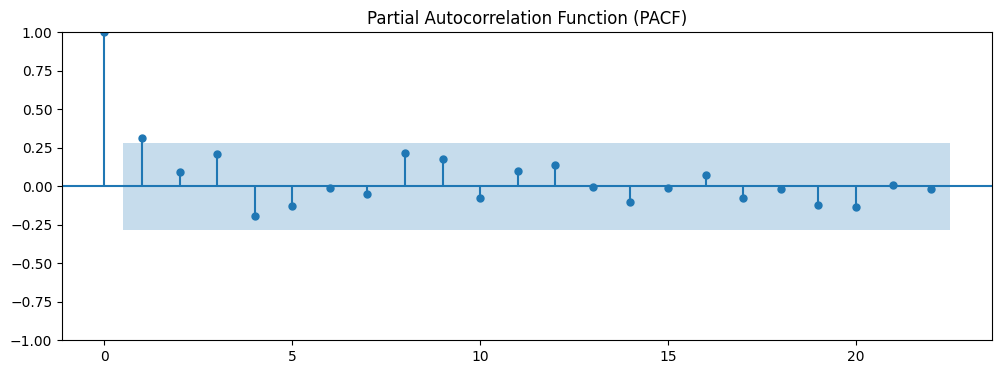

In [58]:
# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(monthly_office_supplies, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(monthly_office_supplies, lags=22, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

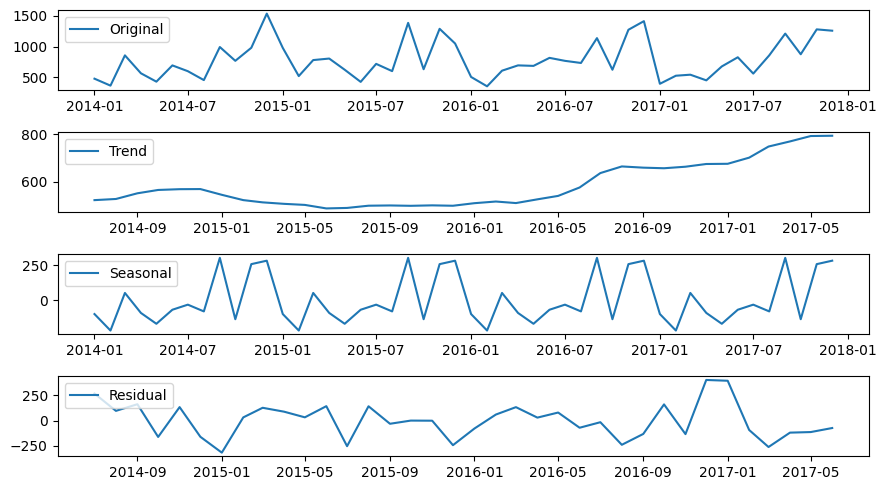

In [59]:
# Checking for Seasonality
tsd_result2 = seasonal_decompose(monthly_office_supplies, model='additive')  # Assuming annual seasonality

# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(9, 5))
plt.subplot(4, 1, 1)
plt.plot(monthly_furniture, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(tsd_result2.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(tsd_result2.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(tsd_result2.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In the seasonal component there is are periodic patterns therefore suggesting the presence of seasonality in the time series.

## Train Test Split

In [44]:
# Train test split for office supplies
# Choose a split date
split_date2 = monthly_office_supplies.tail(12).index[0].strftime('%m/%d/%Y') # Get the top 12th index as a string

# Split train and test data
train_data_office = monthly_office_supplies[monthly_office_supplies.index < split_date]
test_data_office = monthly_office_supplies[monthly_office_supplies.index >= split_date]

## Checking for best ARIMA order

In [61]:
# Reset the index to make 'Order Date' a column
monthly_office_supplies_df = monthly_office_supplies.reset_index()

# Fit ARIMA models with different orders
p_values = range(3)
q_values = range(3)

best_aic = np.inf
best_order = None

for p in p_values:
    for q in q_values:
        order = (p, 1, q)  # ARIMA model order with differencing (d=1)
        model = ARIMA(monthly_office_supplies_df['Sales'], order=order)
        results = model.fit()

        # Evaluate model using AIC
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order

# Display the best order and AIC
print(f"Best ARIMA Order: {best_order}")
print(f"AIC for the Best Model: {best_aic}")

Best ARIMA Order: (0, 1, 1)
AIC for the Best Model: 664.9614866328428


## ARIMA

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -245.353
Date:                Thu, 14 Dec 2023   AIC                            494.705
Time:                        08:22:58   BIC                            497.816
Sample:                    01-01-2014   HQIC                           495.779
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6932      0.135     -5.152      0.000      -0.957      -0.429
sigma2      7.057e+04   1.74e+04      4.059      0.000    3.65e+04    1.05e+05
Ljung-Box (L1) (Q):                   0.82   Jarque-

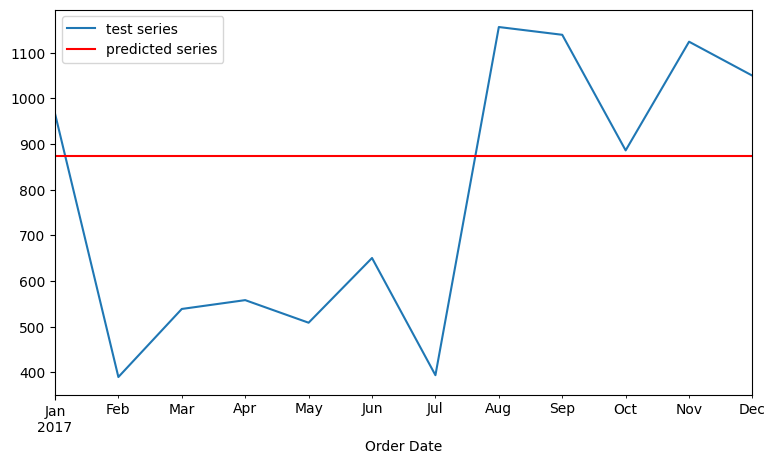

In [62]:
# Set best order as the values obtained
best_order2 = (0, 1, 1)

# Fit ARIMA model with the best orders on train set
arima_model2 = ARIMA(train_data_office, order=best_order2)
arima_fit2 = arima_model2.fit()

# Display the summary of the model
print(arima_fit2.summary())

# Get the last date in the training data
last_date_train = train_data_office.index[-1]

# Determine the number of months for the forecast
forecast_months = len(test_data_furniture)

# Forecast start date and end date adjustment by months
forecast_start_date = last_date_train + pd.DateOffset(months=1)
forecast_end_date = forecast_start_date + pd.DateOffset(months=forecast_months-1)

# Forecast for the specific date range
arima_pred2 = arima_fit2.predict(start=forecast_start_date, end=forecast_end_date)

# Calculate MAE and RMSE
mae_arma2 = mean_absolute_error(test_data_office, arima_pred2)
rmse_arma2 = np.sqrt(mean_squared_error(test_data_office, arima_pred2))
print("\n")
print(f"ARIMA Model - MAE: {mae_arma2:.2f}, RMSE: {rmse_arma2:.2f}")

# Plot forecasts against actual outcomes
plt.figure(figsize=(9, 5))
test_data_office.plot(label= 'test series')
arima_pred2.plot(color='red', label='predicted series')
plt.legend()
plt.show()

An Mean Absolute Error (MAE) of 273.48 implies that, on average, the predictions deviate by approximately 273.48 units from the actual values. In comparison, the Root Mean Squared Error (RMSE) of 304.61 signifies the average magnitude of deviations, encompassing both overestimations and underestimations in the predictions.

## SARIMA

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -160.638
Date:                            Thu, 14 Dec 2023   AIC                            327.275
Time:                                    15:28:02   BIC                            330.682
Sample:                                01-01-2014   HQIC                           328.132
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7797      0.453     -1.722      0.085      -1.667       0.108
ma.S.L12      -0.5716      0.934   

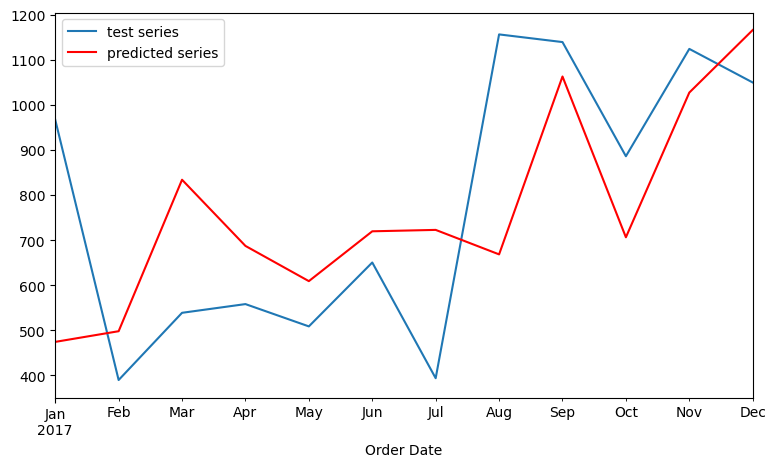

In [53]:
# Fit SARIMA model with the best orders on train set
sarimax_model2 = SARIMAX(train_data_office, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_fit2 = sarimax_model2.fit()

# Display the summary of the model
print(sarima_fit2.summary())

# Get the last date in the training data
last_date_train2 = train_data_office.index[-1]

# Determine the number of months for the forecast
forecast_months2 = len(test_data_office)

# Forecast start date and end date adjustment by months
forecast_start_date2 = last_date_train2 + pd.DateOffset(months=1)
forecast_end_date2 = forecast_start_date2 + pd.DateOffset(months=forecast_months2-1)

# Forecast for the specific date range
sarimax_pred2 = sarima_fit2.predict(start=forecast_start_date2, end=forecast_end_date2)

# Calculate MAE and RMSE
mae_arma2 = mean_absolute_error(test_data_office, sarimax_pred2)
rmse_arma2 = np.sqrt(mean_squared_error(test_data_office, sarimax_pred2))
print("\n")
print(f"SARIMA Model - MAE: {mae_arma2:.2f}, RMSE: {rmse_arma2:.2f}")

# Plot forecasts against actual outcomes
plt.figure(figsize=(9, 5))
test_data_office.plot(label= 'test series')
sarimax_pred2.plot(color='red', label='predicted series')
plt.legend()
plt.show()

The SARIMA model, with a significantly lower Akaike Information Criterion (AIC) at 327.275 compared to the ARIMA model's 494.705, proves to be a better fit for the data. A lower AIC indicates a superior model fit. Additionally, the SARIMA model outshines the ARIMA model in other metrics, with a lower Mean Absolute Error (MAE) at 206.68 compared to 273.48, suggesting closer point predictions to actual values. Moreover, the SARIMA model boasts a lower Root Mean Squared Error (RMSE) at 254.94 compared to 304.61, indicating smaller average prediction errors. Overall, SARIMA outperforms ARIMA for office supplies, showcasing its effectiveness in capturing underlying data patterns, especially with the inclusion of seasonality.

## Facebook Prophet

15:29:18 - cmdstanpy - INFO - Chain [1] start processing
15:29:18 - cmdstanpy - INFO - Chain [1] done processing




Facebook Prophet Model - MAE: 303.51, RMSE: 398.68


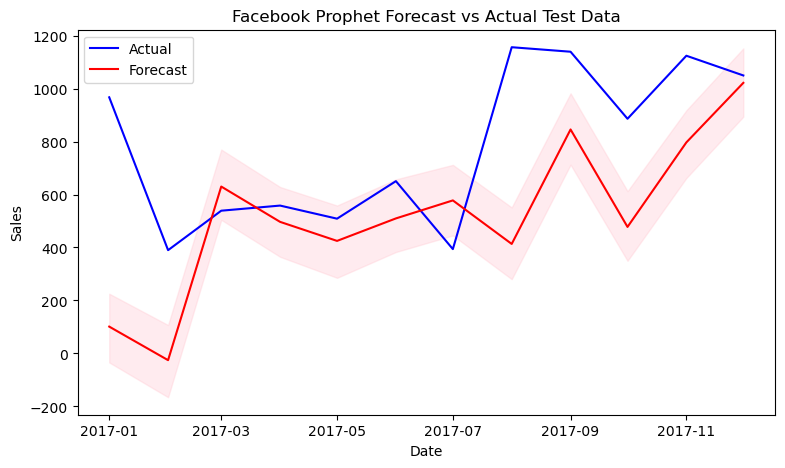

In [56]:
# Find the last date in the training data
last_date_train2 = train_data_office.index[-1]

# Increment the last date by one month to get the start date for forecasting
start_date2 = last_date_train2 + pd.DateOffset(months=1)

# Create a DataFrame with future dates starting from the next day
future2 = pd.DataFrame({'ds': pd.date_range(start=start_date2, periods=12, freq='MS')})

# Create and fit the Prophet model
prophet_data2 = train_data_office.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})
fb_model2 = Prophet()
fb_model2.fit(prophet_data2)

# Generate forecasts
facebook_pred2 = fb_model2.predict(future2)

# Plot the forecast vs the test dataset
# Merge the Prophet forecast with the test_data
merged_df2 = pd.merge(test_data_office, facebook_pred2[['ds', 'yhat',
                                                 'yhat_lower', 'yhat_upper']],
                     left_index=True, right_on='ds')

# Plot the actual test data and the forecast
plt.figure(figsize=(9, 5))

# Plot the actual test data
plt.plot(merged_df2['ds'], merged_df2['Sales'], label='Actual', color='blue')

# Plot the forecast
plt.plot(merged_df2['ds'], merged_df2['yhat'], label='Forecast', color='red')

# Fill uncertainty intervals
plt.fill_between(merged_df2['ds'], merged_df2['yhat_lower'], merged_df2['yhat_upper'],
                 color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Facebook Prophet Forecast vs Actual Test Data')
plt.legend();

# Evaluate forecasts
# Change the index of forecasted series
facebook_pred2 = facebook_pred2.set_index('ds')
mae_arma3 = mean_absolute_error(test_data_office, facebook_pred2['yhat'])
rmse_arma3 = np.sqrt(mean_squared_error(test_data_office, facebook_pred2['yhat']))
print("\n")
print(f"Facebook Prophet Model - MAE: {mae_arma3:.2f}, RMSE: {rmse_arma3:.2f}")

Facebook Prophet records the highest Mean Absolute Error (MAE) at 303.51 and the highest Root Mean Squared Error (RMSE) at 398.68. However, in the context of office supplies, SARIMA surpasses both ARIMA and Facebook Prophet in both MAE and RMSE, showcasing superior predictive performance.

In [57]:
facebook_pred2

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2017-01-01,671.320332,-34.063337,225.504659,671.320315,671.320349,-570.100327,-570.100327,-570.100327,-570.100327,-570.100327,-570.100327,0.0,0.0,0.0,101.220005
2017-02-01,671.573289,-165.373427,107.175427,671.573236,671.573346,-697.041580,-697.041580,-697.041580,-697.041580,-697.041580,-697.041580,0.0,0.0,0.0,-25.468291
2017-03-01,671.801767,504.497837,769.741968,671.801661,671.801879,-41.716807,-41.716807,-41.716807,-41.716807,-41.716807,-41.716807,0.0,0.0,0.0,630.084960
2017-04-01,672.054724,364.829420,628.365575,672.054564,672.054906,-175.333429,-175.333429,-175.333429,-175.333429,-175.333429,-175.333429,0.0,0.0,0.0,496.721295
2017-05-01,672.299522,285.472201,558.360177,672.299283,672.299781,-247.436523,-247.436523,-247.436523,-247.436523,-247.436523,-247.436523,0.0,0.0,0.0,424.862998
2017-06-01,672.552479,382.906413,657.144948,672.552170,672.552821,-162.794260,-162.794260,-162.794260,-162.794260,-162.794260,-162.794260,0.0,0.0,0.0,509.758219
2017-07-01,672.797277,445.556449,711.916541,672.796902,672.797710,-95.057613,-95.057613,-95.057613,-95.057613,-95.057613,-95.057613,0.0,0.0,0.0,577.739663
2017-08-01,673.050234,280.398014,551.211253,673.049775,673.050763,-259.672033,-259.672033,-259.672033,-259.672033,-259.672033,-259.672033,0.0,0.0,0.0,413.378201
2017-09-01,673.303191,712.715745,982.029061,673.302654,673.303823,172.319253,172.319253,172.319253,172.319253,172.319253,172.319253,0.0,0.0,0.0,845.622445


## Forecasting Performance Comparison

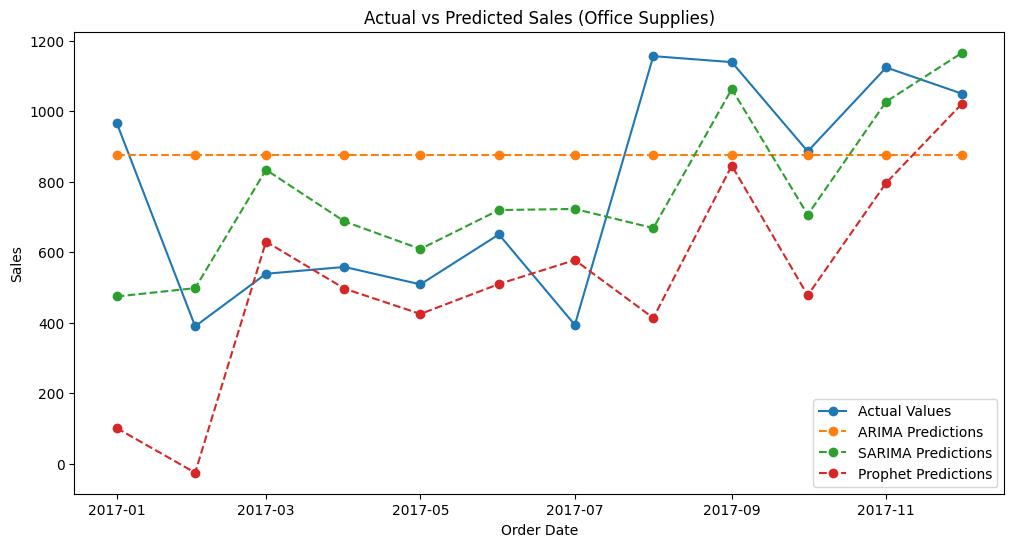

In [65]:
# Plot actual values against predicted values from ARIMA, SARIMA, and Prophet models
plt.figure(figsize=(12, 6))
plt.plot(test_data_office.index, test_data_office, label='Actual Values', marker='o')  # Plot actual values

# Plot predicted values from ARIMA
plt.plot(test_data_office.index, arima_pred2, label='ARIMA Predictions', linestyle='dashed', marker='o')

# Plot predicted values from SARIMA
plt.plot(test_data_office.index, sarimax_pred2, label='SARIMA Predictions', linestyle='dashed', marker='o')

# Plot predicted values from Prophet
plt.plot(merged_df2['ds'], merged_df2['yhat'], label='Prophet Predictions', linestyle='dashed', marker='o')

plt.title('Actual vs Predicted Sales (Office Supplies)')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## 5 Year Office Supplies Forecast - SARIMA

We will use our best performing model SARIMA to predict office supplies sales for the next 5 years.

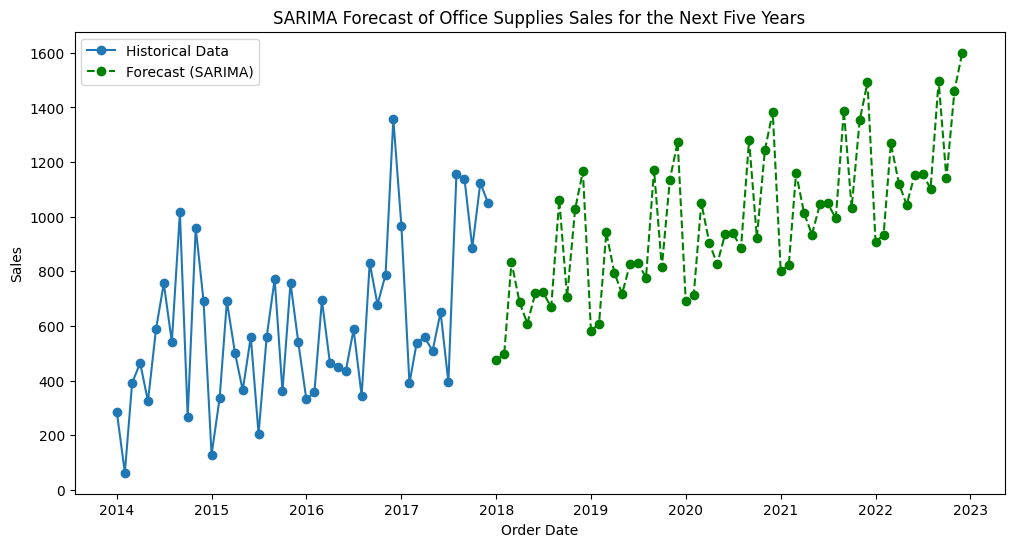

In [66]:
# Generate future dates for the next five years
future_five_years_office_sarima = pd.DataFrame({'ds': pd.date_range(start=monthly_office_supplies.index[-1] + pd.DateOffset(months=1), periods=12*5, freq='MS')})

# Make predictions for the next five years using SARIMA
sarima_forecast_five_years_office = sarima_fit2.get_forecast(steps=12*5)
sarima_forecast_five_years_office_df = sarima_forecast_five_years_office.predicted_mean

# Plot the historical data and the forecast using SARIMA
plt.figure(figsize=(12, 6))
plt.plot(monthly_office_supplies.index, monthly_office_supplies, label='Historical Data', marker='o')
plt.plot(future_five_years_office_sarima['ds'], sarima_forecast_five_years_office_df, label='Forecast (SARIMA)', linestyle='dashed', marker='o', color='green')

plt.title('SARIMA Forecast of Office Supplies Sales for the Next Five Years')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

**Observation**

Sales follow a repeating pattern, reaching their lowest points in the early months of the year, particularly in January and February, before steadily rising. The pinnacle of sales consistently occurs towards the end of the year, specifically in October, November, and December. Moreover, there is a noticeable decline in sales around April and mid-year in June.

The forecast effectively captures the inherent seasonality in the data, precisely mirroring the trend of lower sales at the beginning of the year and an upswing towards the end.

In the forecast, a clear upward trend in sales is expected over the next five years.

## Technology

In [45]:
technology = df.loc[df['Category'] == 'Technology']
technology.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737


In [46]:
columns = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(columns, axis=1, inplace=True)

In [47]:
technology = technology.groupby('Order Date')['Sales'].sum().reset_index().sort_values('Order Date')
technology.head()

,Order Date,Sales
0,2014-01-06,1147.94
1,2014-01-09,31.20
2,2014-01-13,646.74
3,2014-01-15,149.95
4,2014-01-16,124.20


## Make Date the Index

In [48]:
# Set the date column as the index
technology.set_index('Order Date', inplace=True)

In [49]:
technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

## Resampling

In [50]:
# Downsample 'technology' to a monthly frequency
monthly_technology = technology['Sales'].resample('MS').mean()

In [51]:
monthly_technology.head()

Order Date
2014-01-01     449.041429
2014-02-01     229.787143
2014-03-01    2031.948375
2014-04-01     613.028933
2014-05-01     564.698588
Freq: MS, Name: Sales, dtype: float64

## Visualizing Technology Sales Time Series Data

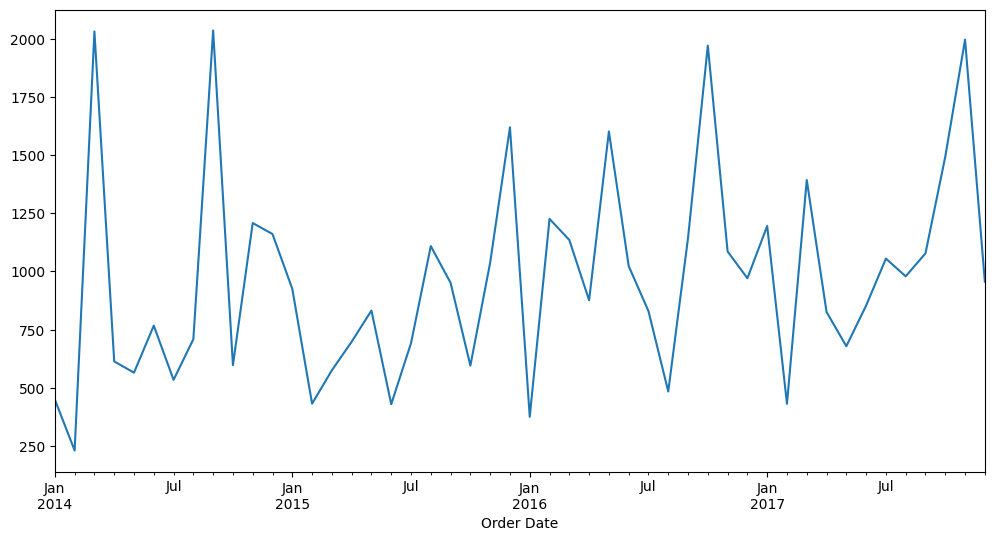

In [74]:
# Visualize the technology sales time series data
monthly_technology.plot(figsize=(12, 6))

plt.show()

* Technology sales vary greatly from month to month, indicating a lack of consistent trends, thus likely challenges in forecasting demand and planning inventory.

* Some of the highest sales figures appear towards the end of the year (September to December) in certain years indicating potential seasonal demand or holiday-related purchases. The superstore may therefore consider tailoring inventory and marketing strategies to accommodate potential spikes in demand during year-end periods.

* Variations in sales performance each year may indicate external factors impacting consumer behavior. This will require for the superstore to explore the underlying factors causing irregularities to understand consumer behavior better.

## Testing for Trends/Stationarity

In [75]:
#DickeyFuller Test on technology

# Perform Dickey-Fuller test
result = adfuller(monthly_technology)

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

# Compare p-value to a significance level to make a decision about stationarity
if p_value <= 0.05:
    print('The time series is likely stationary.')
else:
    print('The time series is likely non-stationary.')

Test Statistic: -7.187969198209019
P-value: 2.547333596027373e-10
The time series is likely stationary.


## Plotting ACF & PACF

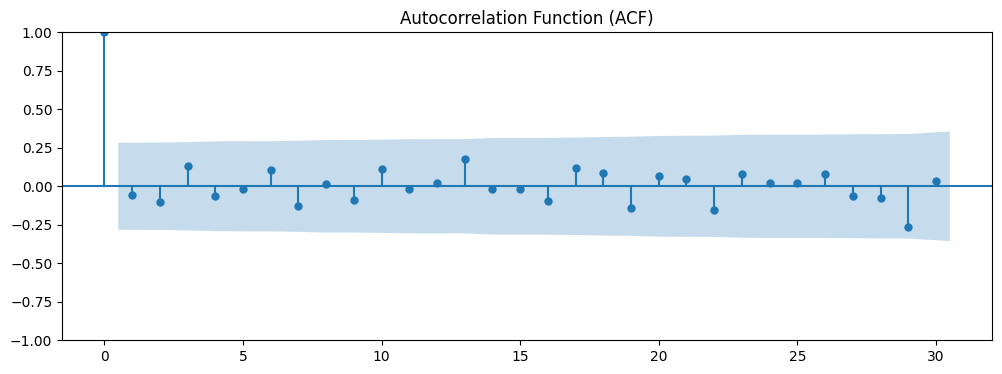

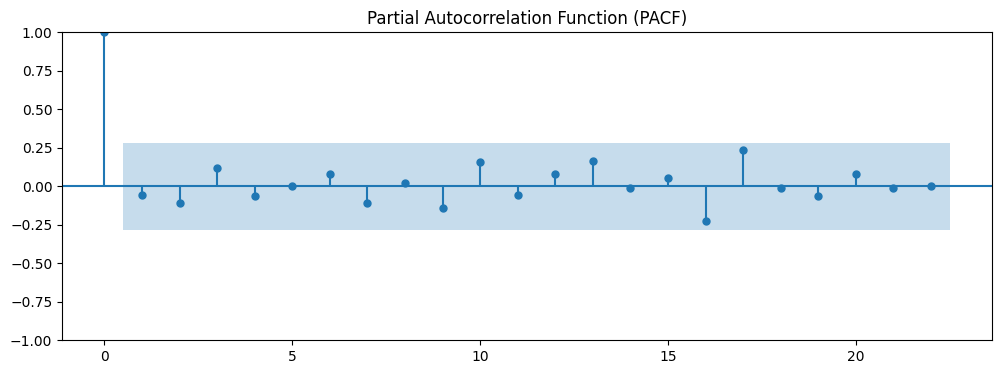

In [76]:
# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(monthly_technology, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(monthly_technology, lags=22, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

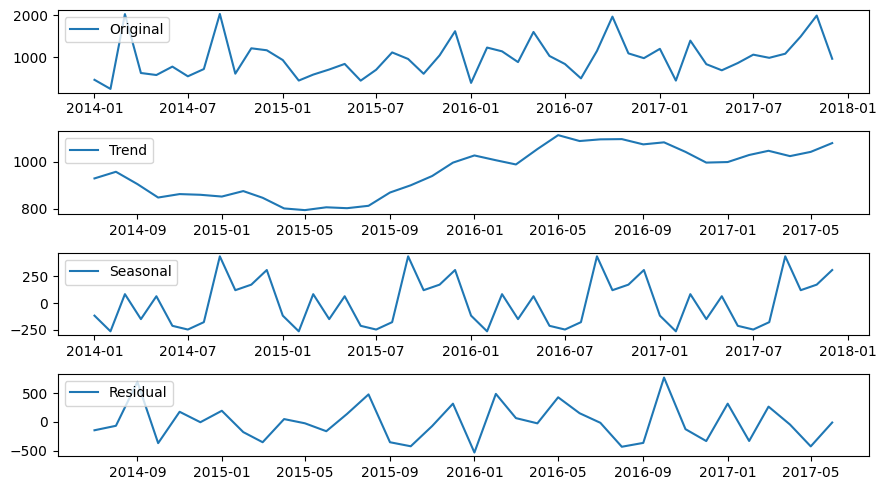

In [77]:
# Checking for Seasonality
# Seasonal decomposition using statsmodels
tsd_result3 = seasonal_decompose(monthly_technology, model='additive')  # Assuming annual seasonality

# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(9, 5))
plt.subplot(4, 1, 1)
plt.plot(monthly_technology, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(tsd_result3.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(tsd_result3.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(tsd_result3.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In the seasonal component there is are periodic patterns therefore suggesting the presence of seasonality in the time series.

## Train Test Split

In [52]:
# Train test split for technology
# Choose a split date
split_date = monthly_technology.tail(12).index[0].strftime('%m/%d/%Y') # Get the top 12th index as a string

# Split train and test data
train_data_technology = monthly_technology[monthly_technology.index < split_date]
test_data_technology = monthly_technology[monthly_technology.index >= split_date]

## Checking for best ARIMA order

In [79]:
# Reset the index to make 'Order Date' a column
monthly_technology_df = monthly_technology.reset_index()

# Fit ARIMA models with different orders
p_values = range(3)
q_values = range(3)

best_aic = np.inf
best_order = None

for p in p_values:
    for q in q_values:
        order = (p, 1, q)  # ARIMA model order with differencing (d=1)
        model = ARIMA(monthly_technology_df['Sales'], order=order)
        results = model.fit()

        # Evaluate model using AIC
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order

# Display the best order and AIC
print(f"Best ARIMA Order: {best_order}")
print(f"AIC for the Best Model: {best_aic}")

Best ARIMA Order: (0, 1, 1)
AIC for the Best Model: 715.4209755749894


## ARIMA

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -266.415
Date:                Thu, 14 Dec 2023   AIC                            536.830
Time:                        08:23:03   BIC                            539.941
Sample:                    01-01-2014   HQIC                           537.904
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9377      0.171     -5.468      0.000      -1.274      -0.602
sigma2      2.244e+05   4.26e+04      5.273      0.000    1.41e+05    3.08e+05
Ljung-Box (L1) (Q):                   0.82   Jarque-

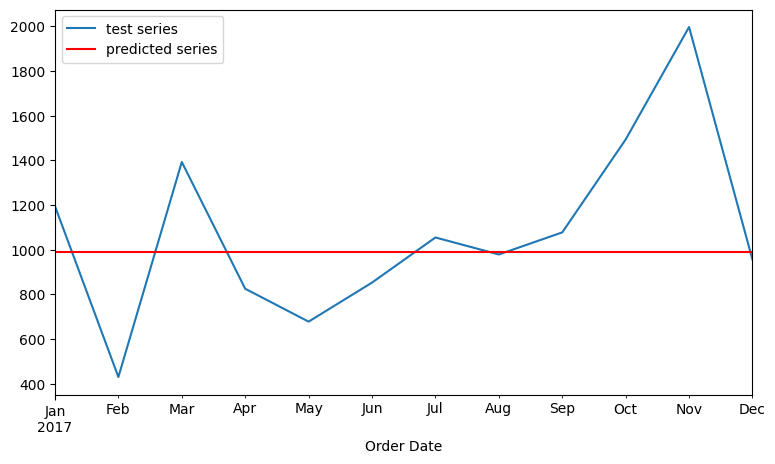

In [80]:
# Set best order as the values obtained
best_order3 = (0, 1, 1)

# Fit ARIMA model with the best orders on train set
arima_model3 = ARIMA(train_data_technology, order=best_order3)
arima_fit3 = arima_model3.fit()

# Display the summary of the model
print(arima_fit3.summary())

# Get the last date in the training data
last_date_train3 = train_data_technology.index[-1]

# Determine the number of months for the forecast
forecast_months3 = len(test_data_technology)

# Forecast start date and end date adjustment by months
forecast_start_date3 = last_date_train3 + pd.DateOffset(months=1)
forecast_end_date3 = forecast_start_date3 + pd.DateOffset(months=forecast_months3-1)

# Forecast for the specific date range
arima_pred3 = arima_fit3.predict(start=forecast_start_date, end=forecast_end_date)

# Calculate MAE and RMSE
mae_arma3 = mean_absolute_error(test_data_technology, arima_pred3)
rmse_arma3 = np.sqrt(mean_squared_error(test_data_technology, arima_pred3))
print("\n")
print(f"ARIMA Model - MAE: {mae_arma3:.2f}, RMSE: {rmse_arma3:.2f}")

# Plot forecasts against actual outcomes
plt.figure(figsize=(9, 5))
test_data_technology.plot(label= 'test series')
arima_pred3.plot(color='red', label='predicted series')
plt.legend()
plt.show()

The model exhibits a relatively elevated Mean Absolute Error (MAE) of 290.73 and Root Mean Squared Error (RMSE) of 401.75. These values suggest a notable level of error in the predictions when compared to the actual values.

## SARIMA

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -179.482
Date:                            Thu, 14 Dec 2023   AIC                            364.964
Time:                                    08:23:04   BIC                            368.371
Sample:                                01-01-2014   HQIC                           365.821
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9994     28.972     -0.034      0.972     -57.784      55.785
ma.S.L12      -0.9819     28.972   

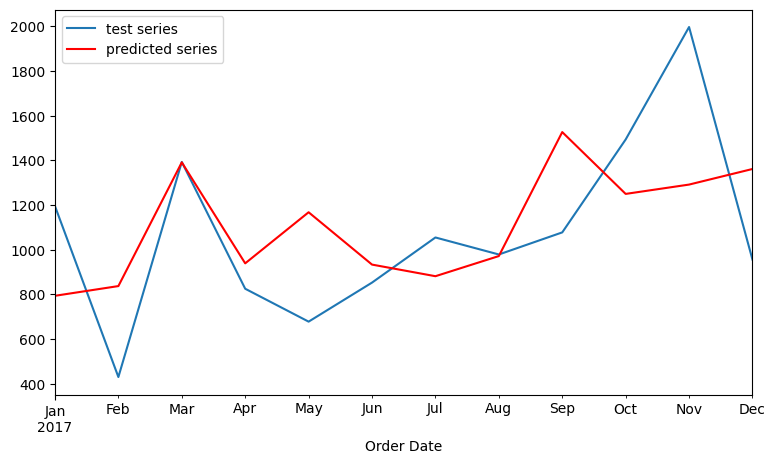

In [81]:
# Fit SARIMA model with the best orders on train set
sarimax_model3 = SARIMAX(train_data_technology, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_fit3 = sarimax_model3.fit()

# Display the summary of the model
print(sarima_fit3.summary())

# Get the last date in the training data
last_date_train3 = train_data_technology.index[-1]

# Determine the number of months for the forecast
forecast_months3 = len(test_data_technology)

# Forecast start date and end date adjustment by months
forecast_start_date3 = last_date_train3 + pd.DateOffset(months=1)
forecast_end_date3 = forecast_start_date3 + pd.DateOffset(months=forecast_months-1)

# Forecast for the specific date range
sarimax_pred3 = sarima_fit3.predict(start=forecast_start_date3, end=forecast_end_date3)

# Calculate MAE and RMSE
mae_arma3 = mean_absolute_error(test_data_technology, sarimax_pred3)
rmse_arma3 = np.sqrt(mean_squared_error(test_data_technology, sarimax_pred3))
print("\n")
print(f"SARIMA Model - MAE: {mae_arma3:.2f}, RMSE: {rmse_arma3:.2f}")

# Plot forecasts against actual outcomes
plt.figure(figsize=(9, 5))
test_data_technology.plot(label= 'test series')
sarimax_pred3.plot(color='red', label='predicted series')
plt.legend()
plt.show()

SARIMA exhibits a slightly lower Mean Absolute Error (MAE) at 289.75 compared to ARIMA's 290.73, suggesting that, on average, SARIMA's predictions are slightly closer to the actual values. Notably, SARIMA also boasts a significantly lower Root Mean Squared Error (RMSE) of 358.01 compared to ARIMA's 401.75, indicating smaller overall prediction errors. In both MAE and RMSE metrics, SARIMA demonstrates a slight performance edge over ARIMA for technology product sales.

## Facebook Prophet

16:36:15 - cmdstanpy - INFO - Chain [1] start processing
16:36:15 - cmdstanpy - INFO - Chain [1] done processing




Facebook Prophet Model - MAE: 260.69, RMSE: 347.58


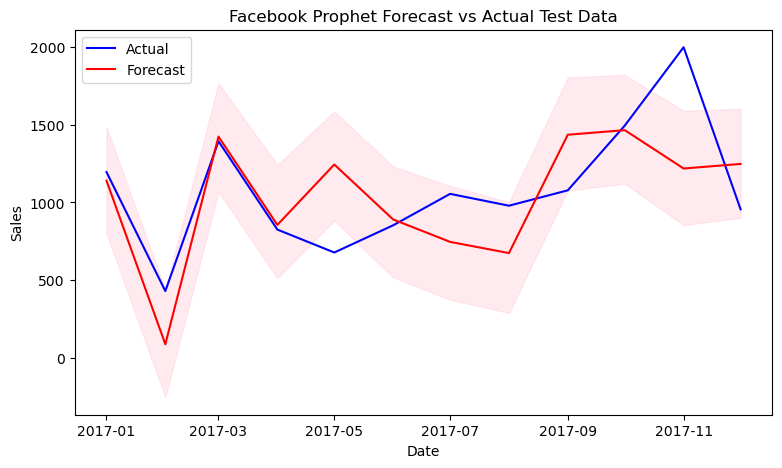

In [84]:
# Find the last date in the training data
last_date_train3 = train_data_technology.index[-1]

# Increment the last date by one month to get the start date for forecasting
start_date3 = last_date_train3 + pd.DateOffset(months=1)

# Create a DataFrame with future dates starting from the next day
future = pd.DataFrame({'ds': pd.date_range(start=start_date3, periods=12, freq='MS')})

# Create and fit the Prophet model
prophet_data3 = train_data_technology.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})
fb_model3 = Prophet()
fb_model3.fit(prophet_data3)

# Generate forecasts
facebook_pred3 = fb_model3.predict(future)

# Plot the forecast vs the test dataset
# Merge the Prophet forecast with the test_data
merged_df3 = pd.merge(test_data_technology, facebook_pred3[['ds', 'yhat',
                                                 'yhat_lower', 'yhat_upper']],
                     left_index=True, right_on='ds')

# Plot the actual test data and the forecast
plt.figure(figsize=(9, 5))

# Plot the actual test data
plt.plot(merged_df3['ds'], merged_df3['Sales'], label='Actual', color='blue')

# Plot the forecast
plt.plot(merged_df3['ds'], merged_df3['yhat'], label='Forecast', color='red')

# Fill uncertainty intervals
plt.fill_between(merged_df3['ds'], merged_df3['yhat_lower'], merged_df3['yhat_upper'],
                 color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Facebook Prophet Forecast vs Actual Test Data')
plt.legend();

# Evaluate forecasts
# Change the index of forecasted series
facebook_pred3 = facebook_pred3.set_index('ds')
mae_arma3 = mean_absolute_error(test_data_technology, facebook_pred3['yhat'])
rmse_arma3 = np.sqrt(mean_squared_error(test_data_technology, facebook_pred3['yhat']))
print("\n")
print(f"Facebook Prophet Model - MAE: {mae_arma3:.2f}, RMSE: {rmse_arma3:.2f}")

Prophet from Facebook demonstrates superior predictive performance with the lowest Mean Absolute Error (MAE) at 260.69, outperforming both ARIMA (290.73) and SARIMA (289.75). This implies that, on average, Prophet's predictions closely align with actual values compared to the other two models. Additionally, Prophet exhibits the smallest Root Mean Squared Error (RMSE) at 347.58, surpassing ARIMA (401.75) and SARIMA (358.01). These findings indicate that Prophet consistently delivers more accurate predictions for technology product sales, demonstrating its efficiency over traditional time series models.

## Forecasting Performance Comparison

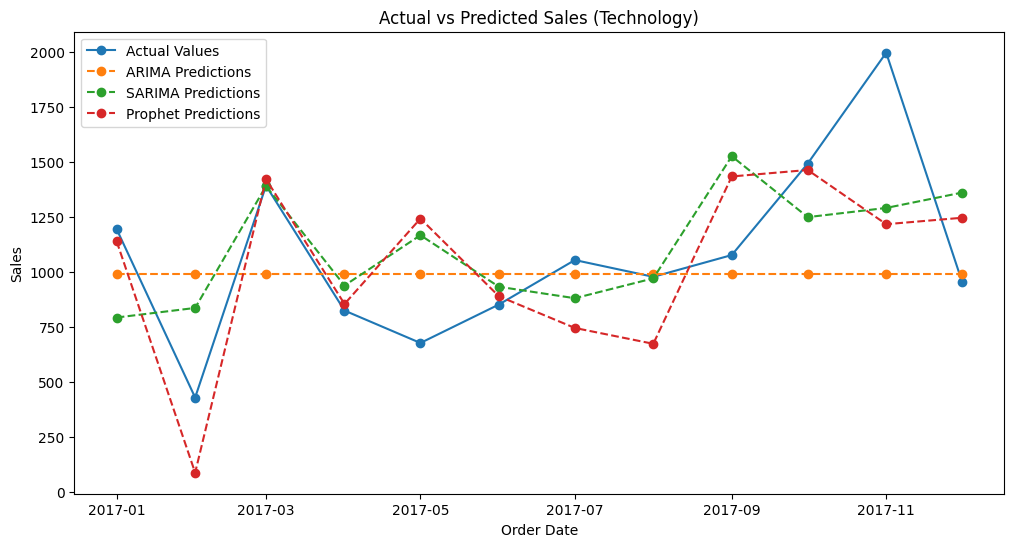

In [83]:
# Plot actual values against predicted values from ARIMA, SARIMA, and Prophet models
plt.figure(figsize=(12, 6))
plt.plot(test_data_technology.index, test_data_technology, label='Actual Values', marker='o')  # Plot actual values

# Plot predicted values from ARIMA
plt.plot(test_data_technology.index, arima_pred3, label='ARIMA Predictions', linestyle='dashed', marker='o')

# Plot predicted values from SARIMA
plt.plot(test_data_technology.index, sarimax_pred3, label='SARIMA Predictions', linestyle='dashed', marker='o')

# Plot predicted values from Prophet
plt.plot(merged_df3['ds'], merged_df3['yhat'], label='Prophet Predictions', linestyle='dashed', marker='o')

plt.title('Actual vs Predicted Sales (Technology)')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## 5 Year Technology Forecast - Facebook Prophet

We will use our best performing model Facebook prophet to predict office supplies sales for the next 5 years.

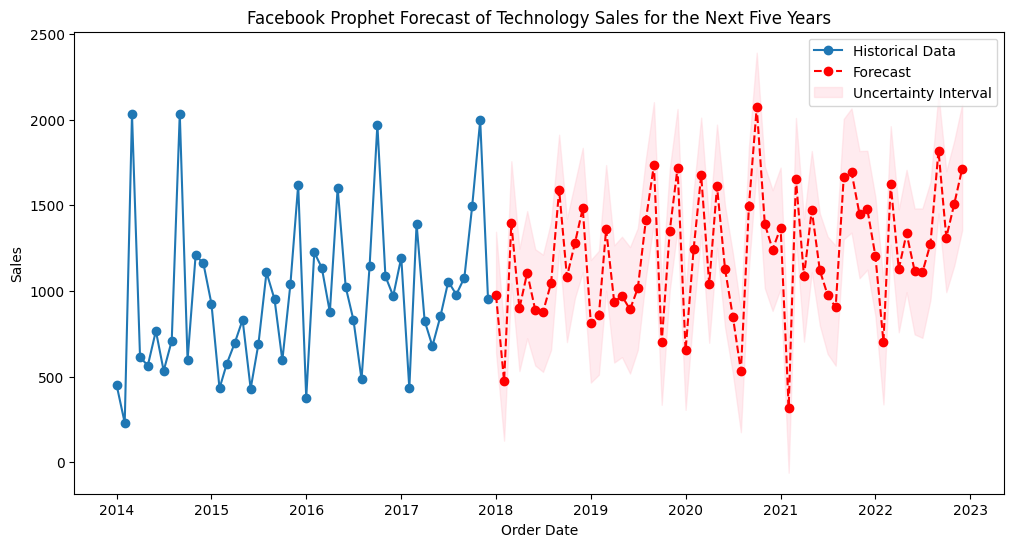

In [84]:
# Generate future dates for the next five years
future_technology = pd.DataFrame({'ds': pd.date_range(start=monthly_technology.index[-1] + pd.DateOffset(months=1), periods=12*5, freq='MS')})

# Make predictions for the next five years
forecast_technology = fb_model3.predict(future_technology)

# Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_technology.index, monthly_technology, label='Historical Data', marker='o')
plt.plot(forecast_technology['ds'], forecast_technology['yhat'], label='Forecast', linestyle='dashed', marker='o', color='red')
plt.fill_between(forecast_technology['ds'], forecast_technology['yhat_lower'], forecast_technology['yhat_upper'],
                 color='pink', alpha=0.3, label='Uncertainty Interval')

plt.title('Facebook Prophet Forecast of Technology Sales for the Next Five Years')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

**Observation**

Sales exhibit a recurring pattern, hitting their lowest points in the early months of the year, especially in January and February, before gradually increasing. The peak of sales consistently occurs towards the end of the year, specifically in October, November, and December. Moreover, there is a noticeable dip in sales around April and mid-year in June.

The forecast adeptly captures the inherent seasonality in the data, accurately reflecting the trend of lower sales at the beginning of the year and an upward swing towards the end.

In the forecast, there isn't a substantial expected change in sales over the next five years.

## Encoder - Decoder LSTM

The encoder-decoder LSTM model is used for [prediction problems where there are both input and output sequences](https://machinelearningmastery.com/encoder-decoder-long-short-term-memory-networks/). It is the best model for our problem, whereby, the multi-output sequence may have a varying length depending on the user's need.

It is comprised of two sub-models: the encoder and the decoder. The encoder is the model responsible for reading and interpreting the input sequence. The output of the encoder is a fixed length vector that represents the model’s interpretation of the sequence.

The decoder uses the output of the encoder as an input.

In [85]:
# Merge the train datasets
# Concatenate the DataFrames column-wise
merged_train_data = pd.concat([train_data_furniture, train_data_office, train_data_technology], axis=1)

# Renaming the columns
merged_train_data.columns = ['Furniture', 'Office Supplies', 'Technology']

# Display the DataFrame with updated column names
merged_train_data.head()

,Furniture,Office Supplies,Technology
Order Date,,,
2014-01-01,480.194231,285.357647,449.041429
2014-02-01,367.931600,63.042588,229.787143
2014-03-01,857.291529,391.176318,2031.948375
2014-04-01,567.488357,464.794750,613.028933
2014-05-01,432.049188,324.346545,564.698588


In [86]:
# Merge the test datasets
# Concatenate the DataFrames column-wise
merged_test_data = pd.concat([test_data_furniture, test_data_office, test_data_technology], axis=1)

# Renaming the columns
merged_test_data.columns = ['Furniture', 'Office Supplies', 'Technology']

# Display the DataFrame with updated column names
merged_test_data.head()

,Furniture,Office Supplies,Technology
Order Date,,,
2017-01-01,397.602133,967.013136,1195.218071
2017-02-01,528.179800,389.882737,430.501714
2017-03-01,544.672240,538.899481,1392.859250
2017-04-01,453.297905,558.229296,825.559133
2017-05-01,678.302328,508.776444,678.329400


In [87]:
# multivariate multi-step encoder-decoder lstm model
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

# Function to split sequences
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequences)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequences):
            break
        seq_x = sequences[i:end_ix, :]
        seq_y = sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Define input sequence
in_seq1 = merged_train_data['Furniture'].values
in_seq2 = merged_train_data['Office Supplies'].values
in_seq3 = merged_train_data['Technology'].values

# Convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, in_seq3))

# Choose a number of time steps
n_steps_in, n_steps_out = 6, 12
# Convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

# Define number of features i.e 3
n_features = X.shape[2]

# Define Encoder-Decoder LSTM model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')
# Fit model
model.fit(X, y, epochs=100, verbose=0)

# Demonstrate prediction
x_input = np.array(merged_train_data[-n_steps_in:]).reshape((1, n_steps_in, n_features))
lstm_prediction = model.predict(x_input, verbose=0)
print(lstm_prediction)

[[[ 204.6969   210.15453  197.04689]
  [ 471.25488  362.39124  499.33746]
  [ 684.173    494.71796  719.58   ]
  [ 773.7792   501.8461   876.67865]
  [ 954.43286  650.85004  994.2808 ]
  [1021.19977  755.23926 1166.9181 ]
  [1056.7932   642.72296 1094.1537 ]
  [ 900.62476  568.2071  1188.8778 ]
  [1001.5265   633.4991  1266.5514 ]
  [1059.5471   711.1411  1351.1031 ]
  [ 959.78235  824.09235 1313.2412 ]
  [ 922.11444  833.7176  1462.401  ]]]


In [88]:
# LSTM Model Evaluation
# Calculate MAE and RMSE for each variable
rmse_lstm_furniture = mean_squared_error(merged_test_data['Furniture'], lstm_prediction[0][:, 0], squared=False)
mae_lstm_furniture = mean_absolute_error(merged_test_data['Furniture'], lstm_prediction[0][:, 0])

rmse_lstm_office = mean_squared_error(merged_test_data['Office Supplies'], lstm_prediction[0][:, 1], squared=False)
mae_lstm_office = mean_absolute_error(merged_test_data['Office Supplies'], lstm_prediction[0][:, 1])

rmse_lstm_tech = mean_squared_error(merged_test_data['Technology'], lstm_prediction[0][:, 2], squared=False)
mae_lstm_tech = mean_absolute_error(merged_test_data['Technology'], lstm_prediction[0][:, 2])

print('LSTM RMSE for furniture: %.3f' % rmse_lstm_furniture)
print('LSTM MAE for furniture: %.3f' % mae_lstm_furniture)
print('LSTM RMSE for office supplies: %.3f' % rmse_lstm_office)
print('LSTM MAE for office supplies: %.3f' % mae_lstm_office)
print('LSTM RMSE for technology: %.3f' % rmse_lstm_tech)
print('LSTM MAE for technology: %.3f' % mae_lstm_tech)

LSTM RMSE for furniture: 260.277
LSTM MAE for furniture: 230.173
LSTM RMSE for office supplies: 346.442
LSTM MAE for office supplies: 263.735
LSTM RMSE for technology: 454.668
LSTM MAE for technology: 349.303


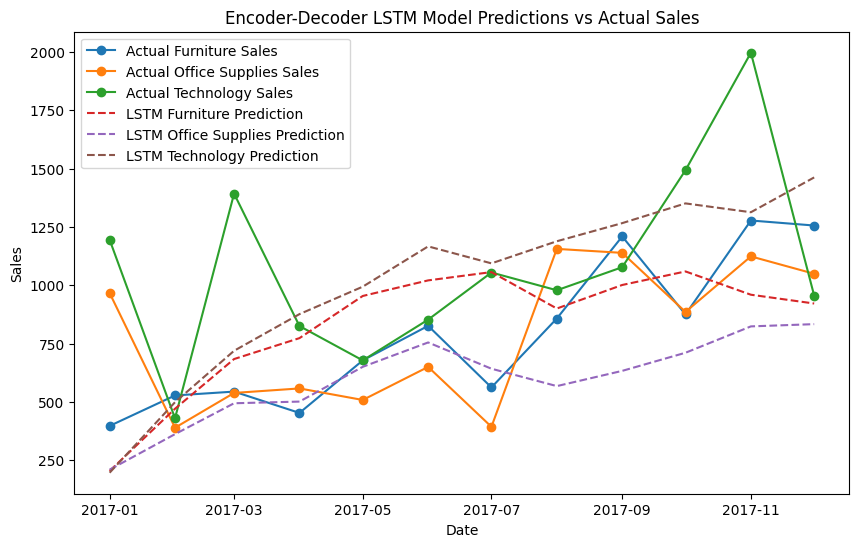

In [89]:
# Plot the LSTM predictions against test data
plt.figure(figsize=(10, 6))

# Plot the actual test data
plt.plot(merged_test_data.index, merged_test_data['Furniture'], label='Actual Furniture Sales', marker='o')
plt.plot(merged_test_data.index, merged_test_data['Office Supplies'], label='Actual Office Supplies Sales', marker='o')
plt.plot(merged_test_data.index, merged_test_data['Technology'], label='Actual Technology Sales', marker='o')

# Plot the LSTM predictions
plt.plot(merged_test_data.index, lstm_prediction[0][:, 0], label='LSTM Furniture Prediction', linestyle='dashed')
plt.plot(merged_test_data.index, lstm_prediction[0][:, 1], label='LSTM Office Supplies Prediction', linestyle='dashed')
plt.plot(merged_test_data.index, lstm_prediction[0][:, 2], label='LSTM Technology Prediction', linestyle='dashed')

plt.title('Encoder-Decoder LSTM Model Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## MODEL DEPLOYMENT

Here are our best-performing models for predicting each category:<br>
Furniture: Facebook Prophet<br>
Office supplies: SARIMAX<br>
Technology: Facebook Prophet<br>

We will therefore, deploy the three models to predict each category separately and then merge the data for display.

In [59]:
# Save the preprocessed datasets
monthly_furniture.to_csv('furniture_data.csv')
monthly_office_supplies.to_csv('office_supplies_data.csv')
monthly_technology.to_csv('technology_data.csv')

We had trained all the models on the train set to allow for performance testing against the test set. We will now train the model on the whole dataset and use it for deployment.

In [79]:
import joblib

# Create and fit the Prophet model for furniture
prophet_furniture_data = monthly_furniture.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})
fb_furniture_model = Prophet()
fb_furniture_model.fit(prophet_furniture_data)

# Saving the best model in a pickle file
with open("fb_furniture_model.pkl", "wb") as f:
    joblib.dump(fb_furniture_model, f) # Best facebook prophet model

# Create and fit the SARIMAX model for office supplies
sarimax_office_model = SARIMAX(monthly_office_supplies, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
sarimax_office_model = sarimax_office_model.fit()

# Saving the best model in a pickle file
with open("sarimax_office_model.pkl", "wb") as f:
    joblib.dump(sarimax_office_model, f) # Best SARIMAX prophet model

# Create and fit the Prophet model for technology
prophet_tech_data = monthly_technology.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})
fb_tech_model = Prophet()
fb_tech_model.fit(prophet_tech_data)

# Saving the best model in a pickle file
with open("fb_tech_model.pkl", "wb") as f:
    joblib.dump(fb_tech_model, f) # Best facebook prophet model

16:29:41 - cmdstanpy - INFO - Chain [1] start processing
16:29:42 - cmdstanpy - INFO - Chain [1] done processing
16:29:42 - cmdstanpy - INFO - Chain [1] start processing
16:29:42 - cmdstanpy - INFO - Chain [1] done processing


In [80]:
# DEPLOYMENT CODE
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import streamlit as st

"""
## Welcome to Sales Analytics Hub.

"""

with open('fb_furniture_model.pkl','rb') as file:
    fb_furniture_model = joblib.load(file) 

with open('sarimax_office_model.pkl','rb') as file:
    sarimax_office_model = joblib.load(file)

with open('fb_tech_model.pkl','rb') as file:
    fb_tech_model = joblib.load(file)

num_of_months = st.number_input('Enter Number of Months Of Sales Prediction')

if st.button("predict"):
    # LOAD THE DATASETS
    monthly_furniture_df = pd.read_csv('furniture_data.csv')
    monthly_office_supplies_df = pd.read_csv('office_supplies_data.csv')
    monthly_technology_df = pd.read_csv('technology_data.csv')
    
    # Convert Date column to time series 
    monthly_furniture_df['Order Date'] = pd.to_datetime(monthly_furniture_df['Order Date'])
    monthly_office_supplies_df['Order Date'] = pd.to_datetime(monthly_office_supplies_df['Order Date'])
    monthly_technology_df['Order Date'] = pd.to_datetime(monthly_technology_df['Order Date'])
    
    # Set date column as the index
    monthly_furniture_df.set_index('Order Date', inplace=True)
    monthly_office_supplies_df.set_index('Order Date', inplace=True)
    monthly_technology_df.set_index('Order Date', inplace=True)
    
    # Find the last date in the datasets
    last_date_furniture = monthly_furniture_df.index[-1]
    last_date_office = monthly_office_supplies_df.index[-1]
    last_date_tech = monthly_technology_df.index[-1]
    
    # Increment the last date by one month to get the start date for forecasting
    start_date_furniture = last_date_furniture + pd.DateOffset(months=1)
    start_date_office = last_date_office + pd.DateOffset(months=1)
    start_date_tech = last_date_tech + pd.DateOffset(months=1)
    
    # For furniture and technology, create a DataFrame with future dates starting from the next day
    future_furniture = pd.DataFrame({'ds': pd.date_range(start=start_date_furniture, periods=num_of_months, freq='MS')})
    future_tech = pd.DataFrame({'ds': pd.date_range(start=start_date_tech, periods=num_of_months, freq='MS')})
    # For office supplies, determine the end date
    forecast_end_date_office = start_date_office + pd.DateOffset(months=num_of_months-1)

    # Generate forecasts
    furniture_pred = fb_furniture_model.predict(future_furniture)
    office_pred = sarimax_office_model.predict(start=start_date_office, end=forecast_end_date_office)
    technology_pred = fb_tech_model.predict(future_tech)
    
    # Rename 'ds' as 'Date' in Prophet forecasts
    furniture_pred = furniture_pred.rename(columns = {'ds': 'Order Date'})
    technology_pred = technology_pred.rename(columns = {'ds': 'Order Date'})
    
    # Set date column of furniture prediction as index
    furniture_pred.set_index('Order Date', inplace=True)
    technology_pred.set_index('Order Date', inplace=True)

    # Rename 'yhat' as 'Price' in furniture prediction
    furniture_pred['Furniture'] = furniture_pred['yhat']

    # Filter unnecessary columns in furniture
    sales_prediction = furniture_pred['Furniture'] 

    # Combine predictions
    office_pred = pd.DataFrame(office_pred)
    sales_prediction['Office'] = office_pred['predicted_mean']
    sales_prediction['Technology'] = technology_pred['yhat']

    """
    ## Number of Months to be Predicted
    """
    num_of_months

    """
    ## Predicted Sales 
    """
    sales_prediction

    # Plot the forecasted price series
    plt.figure(figsize=(10, 6))
    plt.gca().set_facecolor('lightpink') 
    plt.plot(sales_prediction.index, sales_prediction)
    plt.xlabel('Order Date', fontsize=12) 
    plt.ylabel('Sales', fontsize=12) 
    plt.title('Forecasted Store Sales', fontsize=15)
    plt.xticks(rotation=45, ha='right') # Rotate xticks
    st.pyplot(plt)  # Display the plot in Streamlit

## Summary

Furniture, Office Supplies, and Technology sales depict varied trends, showcasing seasonal peaks, irregular fluctuations, and sporadic growth patterns across different months and years.

Weak positive correlations among Furniture, Office Supplies, and Technology sales suggest minor tendencies for these categories to move together, but not strong or robust relationships.

The forecasting models (ARIMA, SARIMA, Facebook Prophet, LSTM) showcase varying performances across categories, emphasizing the need for tailored model selection based on the product segment.Each category presents a distinct champion among the forecasting models, guiding businesses to make informed choices for inventory management and overall performance optimization.

**Furniture Sales Forecasting**:
- Facebook Prophet leads with the most precise forecasts, displaying the lowest MAE and RMSE.
- SARIMA and ARIMA follow closely, demonstrating effectiveness in capturing sales patterns.
- Despite capturing intricate patterns, LSTM exhibits higher errors compared to traditional time series models and Facebook Prophet for furniture sales predictions.

**Office Supplies Sales Forecasting**:
- SARIMA Emerges as the top-performing model with the lowest MAE and RMSE.
- ARIMA and Facebook Prophet trail behind with competitive results, showcasing effectiveness.
- LSTM shows higher errors compared to SARIMA for office supplies sales forecasting.

**Technology Sales Forecasting**:
- Facebook Prophet stands out again with the most accurate forecasts, presenting the lowest MAE and RMSE.
- SARIMA and ARIMA follow suit, demonstrating effectiveness in prediction.
- LSTM displays higher errors compared to the Facebook Prophet model for technology sales forecasting.

## Solving the Business Problem

While the project provided valuable insights into sales trends, profitability, and forecasting models' performances, the challenges in optimizing inventory and maximizing sales potential might persist due to inherent complexities in consumer behavior and market dynamics with 100% accuracy.

Leveraging the time series models effectively can help in better inventory management, targeted marketing, and overall performance improvement. However, continuous refinement and adaptation of strategies are crucial to addressing the unpredictability observed in sales trends.

## Recommendations

- **Inventory Management**: Utilize insights from time series analysis models, especially Facebook Prophet for Technology, SARIMA for Office Supplies, and Facebook Prophet for Furniture, to optimize inventory levels. Leverage forecasts to prevent overstocking or stockouts and align inventory with anticipated demand. That is by increasing inventory during peak seasons and reducing it during off-seasons to minimize carrying costs.

- **Marketing Strategies**: Tailor marketing campaigns and promotional activities to leverage seasonal peaks observed in Furniture and Technology sales, especially during the year-end period. Identify and address sales fluctuations to implement targeted strategies for stable sales e.g. allocate a budget for promotions and discounts during low periods to attract customers and boost sales.

- **Product Launches**: Strategically launch new products for the various categories during peak periods to provide customers with a diverse selection.

- **Supplier Collaboration**: Collaborate closely with suppliers and logistics partners to meet increased demand during peak periods. Negotiate for favorable terms and discounts to reduce overall costs.




## Overall Business Insights

- **Financial Planning**: Allocate higher budgets for sales and costs during peak periods in financial planning. During low periods, focus on cost reduction strategies.

- **Operational Efficiency**: Anticipate increased order fulfillment requirements during peak periods by adjusting stock levels and logistics operations.

- **Customer Insights**: Dive deeper into consumer behavior analysis to understand the drivers behind irregular sales patterns. Leverage this understanding to refine marketing strategies and cater better to customer demands.

- **Performance Tracking**: Regularly assess model performances and update forecasting techniques to accommodate evolving market trends, ensuring accurate predictions and effective decision-making.

- **Staffing**: Plan staffing levels to ensure adequate coverage during high seasons and consider optimizing staff costs by implementing leave rotations during low seasons.

- **Customer Experience**: Ensure stock availability and provide excellent service during high seasons by properly covering staffing needs and optimizing the overall customer experience.

## Limitations

- **Assumption of Stationarity**: Time series models often assume stationarity in data, which might not hold true in real-world scenarios, leading to challenges in model application and accuracy.

- **Seasonal Variations**: Unforeseen changes in consumer behavior, market trends, or external factors (e.g., economic changes, seasonal fluctuations) might impact sales differently than historical data suggests, affecting the accuracy of forecasts.

- **Changing Consumer Behavior**: Behavioral changes in consumers over time might not be captured entirely by historical data, potentially leading to shifts in purchasing patterns that the models may not anticipate accurately.

- **Promotions**: The models do not factor in the effect of promotions in driving sales particularly duiring the holiday seasons.